 # 1. Introduction 
    
# Sentiment Analysis of Customer Reviews

## Objective
- Perform sentiment analysis on e-commerce product reviews.
- Categorize feedback into positive, neutral, or negative sentiments.
- Identify key themes in feedback through word frequency analysis.

## Data Description
- **Dataset:** Women's clothing e-commerce reviews.
- **Includes:** Clothing ID, Age, Review Title, Review Text, Rating, Division Name, Department Name, Class Name.

## Methodology
1. **Data Preprocessing:** Clean and tokenize text data.
2. **Sentiment Analysis:** Use TextBlob and VADER for classification.
3. **Sentiment Distribution:** Summarize the overall sentiment found in the data.
4. **Theme Identification:** Analyze word frequency to uncover themes in positive and negative feedback.

## Tools Comparison
- Evaluate the accuracy and applicability of TextBlob versus VADER in this context.

## Goal
- To derive actionable business insights from sentiment analysis, guiding product and service improvements.


# 2. Importing libraries and dataset 

In [1]:
#Data manipulation libraries
import pandas as pd
import numpy as np

#Visualization libraries
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, CountVectorizer, CountVectorizer

#Sentiment Analysis
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

# Get maximum column width so all content is visible
pd.set_option('display.max_colwidth', 1)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\swara\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv('BA - Assignment Part 2 data set.csv')
print(df.shape)

(23486, 11)


# 3. Cleaning up the Dataset

Improving data quality is essential for accurate analysis. This section focuses on preparing the dataset for sentiment analysis by conducting initial inspections and addressing outliers or any inconsistencies identified.

## 3.1 Initial Data Inspection

Before diving deep into the cleaning process, a preliminary examination of the dataset is crucial. This step helps in understanding the general structure, spotting any apparent outliers, missing values, or anomalies that could affect subsequent analysis.

### Steps for Inspection:
- **Overview of data:** 
- **Identify missing values:** 
- **Data types inspection:** 

### Identifying Outliers:
- **Statistical summary:** 
- **Visual inspection:** 

This initial inspection is pivotal in setting the stage for a clean, well-structured dataset, thereby making subsequent sentiment analysis more reliable and insightful.

In [3]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses


## Dataset Overview

The dataset consists of 23,486 entries, each providing insights into customer reviews. A preliminary review of the data structure revealed the presence of a column that primarily consists of what seems to be redundant indexing information. 

### Action:
To streamline the dataset and prepare it for a more efficient analysis, the following step will be taken:

- **Drop Redundant Column:** Remove the column identified as containing redundant index information to ensure the dataset only consists of meaningful data.

In [4]:
df.drop(columns = "Unnamed: 0", inplace = True)

### Column Name Refactoring: Convert to Snake Case

In addition to the data manipulation, improving the column names can enhance readability and consistency. One common practice is converting column names to snake case, where spaces are replaced by underscores and all letters are in lowercase.

To achieve this, follow these steps:

1. **Convert to Lowercase**: Ensure all letters in the column names are lowercase.
2. **Replace Spaces with Underscores**: Replace any spaces in the column names with underscores.

In [5]:
df.columns = (df.columns
                .str.replace(' ', '_')
                .str.lower()
             )
print(df.columns)

Index(['clothing_id', 'age', 'title', 'review_text', 'rating',
       'recommended_ind', 'positive_feedback_count', 'division_name',
       'department_name', 'class_name'],
      dtype='object')


## 3.2 Handling Missing Values

Another good practice is to check how many null values exist in the dataset.





In [6]:
df.isna().sum()

clothing_id                0   
age                        0   
title                      3810
review_text                845 
rating                     0   
recommended_ind            0   
positive_feedback_count    0   
division_name              14  
department_name            14  
class_name                 14  
dtype: int64

### Handling Null Values

Most of the null values are concentrated in the `title` column. Since this column won't be utilized during the analysis, these null values do not impact the results. However, the number of null values in `review_text` is also significant, but this will be addressed in the next block of code.

In [7]:
df[df['review_text'].isna()]

,clothing_id,age,title,review_text,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name
92,861,23,NaN,NaN,5,1,0,General Petite,Tops,Knits
93,1081,31,NaN,NaN,5,1,0,General,Dresses,Dresses
98,1133,50,NaN,NaN,5,1,0,General,Jackets,Outerwear
135,861,35,NaN,NaN,4,1,0,General Petite,Tops,Knits
142,1126,35,NaN,NaN,5,1,0,General,Jackets,Outerwear
...,...,...,...,...,...,...,...,...,...,...
23258,862,35,NaN,NaN,4,1,0,General,Tops,Knits
23301,862,52,NaN,NaN,5,1,0,General,Tops,Knits
23303,823,46,NaN,NaN,5,1,0,General,Tops,Blouses
23470,1104,39,NaN,NaN,5,1,0,General Petite,Dresses,Dresses


In [8]:
missing_rows = df['review_text'].isna().sum()
print(f'Percentage of Missing Values: {round(missing_rows/(len(df))*100,2)}%')

Percentage of Missing Values: 3.6%


### Next Step: Dropping Rows with Missing Values from Reviews

To proceed, we need to remove rows with missing values from the 'Reviews' column.

In [9]:
df.dropna(subset=['review_text'], inplace = True)

In [10]:
df.isna().sum()

clothing_id                0   
age                        0   
title                      2966
review_text                0   
rating                     0   
recommended_ind            0   
positive_feedback_count    0   
division_name              13  
department_name            13  
class_name                 13  
dtype: int64

In [11]:
df.dropna(subset=['division_name'], inplace = True)

In [12]:
df.isna().sum()

clothing_id                0   
age                        0   
title                      2966
review_text                0   
rating                     0   
recommended_ind            0   
positive_feedback_count    0   
division_name              0   
department_name            0   
class_name                 0   
dtype: int64

## 3.3 Checking for Duplicates 

In this section, we'll explore how to identify and mark duplicate rows within a DataFrame. The code provided below evaluates each column of the DataFrame and marks duplicate rows as True, while the first occurrence of any duplicate row remains unmarked (ex. False).


In [13]:
df[df.duplicated()]

,clothing_id,age,title,review_text,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name
21888,1022,37,NaN,"Love, love these jeans. being short they come right to my ankle. super soft and don?t require any hemming. i ordered my typical jean size of 26 and they fit like a glove. would love to have these in black and grey.",5,1,0,General,Bottoms,Jeans


## Data Cleaning: Removing Duplicate Entry

Only a single duplicate entry was identified within the dataset. Consequently, it has been eliminated from the DataFrame to ensure data integrity.


In [14]:
df.drop_duplicates(inplace = True)

# 3.4 Data Type Optimization

Identifying data types to find mismatches and correctly setting data types is crucial for effective data cleaning and analysis.

In [15]:
df.dtypes

clothing_id                int64 
age                        int64 
title                      object
review_text                object
rating                     int64 
recommended_ind            int64 
positive_feedback_count    int64 
division_name              object
department_name            object
class_name                 object
dtype: object

## Detecting Categorical Data in Pandas DataFrame

To identify categorical data, one effective method is to obtain unique values from columns classified as 'Object' types.

In [16]:
columns_to_check = ['division_name', 'department_name', 'class_name']
for col in columns_to_check:
    unique_vals = df[col].unique()
    print(f"Distinct entries in {col}: {unique_vals}\n")

Distinct entries in division_name: ['Initmates' 'General' 'General Petite']

Distinct entries in department_name: ['Intimate' 'Dresses' 'Bottoms' 'Tops' 'Jackets' 'Trend']

Distinct entries in class_name: ['Intimates' 'Dresses' 'Pants' 'Blouses' 'Knits' 'Outerwear' 'Lounge'
 'Sweaters' 'Skirts' 'Fine gauge' 'Sleep' 'Jackets' 'Swim' 'Trend' 'Jeans'
 'Legwear' 'Shorts' 'Layering' 'Casual bottoms' 'Chemises']



### In this instance, it's evident that there are some misspelled words such as "Intimates," which need to be corrected.

In [17]:
df['division_name'] = df['division_name'].str.replace('Initmates', 'Intimates')
df['department_name'] = df['department_name'].str.replace('Intimate', 'Intimates')

## Converting Category Columns into Category Data Type & Boolean Columns into Boolean Data Type

In [18]:
df['division_name'] = df['division_name'].astype('category')
df['department_name'] = df['department_name'].astype('category')
df['class_name'] = df['class_name'].astype('category')
df['recommended_ind'] = df['recommended_ind'].astype('bool')

In [19]:
df.dtypes

clothing_id                int64   
age                        int64   
title                      object  
review_text                object  
rating                     int64   
recommended_ind            bool    
positive_feedback_count    int64   
division_name              category
department_name            category
class_name                 category
dtype: object

# 4. Exploratory Data Analysis (EDA)

## 4.1 Qualitative Analysis

### Dataset's structure

To gain a more comprehensive insight into the organization of the dataframe, a pivot table is utilized. This tool effectively illustrates the hierarchical arrangement of departments within divisions, providing a clear view of the dataset's structure.


In [20]:
# Creating a pivot table to showcase unique class names by department and division
unique_class_names = pd.pivot_table(df, values='class_name', index=['division_name', 'department_name'],
                                    aggfunc=lambda x: np.unique(x).tolist())
unique_class_names

class_name
division_name  department_name                                                               
General        Bottoms          [Casual bottoms, Jeans, Pants, Shorts, Skirts]               
               Dresses          [Dresses]                                                    
               Jackets          [Jackets, Outerwear]                                         
               Tops             [Blouses, Fine gauge, Knits, Sweaters]                       
               Trend            [Trend]                                                      
General Petite Bottoms          [Jeans, Pants, Skirts]                                       
               Dresses          [Dresses]                                                    
               Intimates        [Lounge]                                                     
               Jackets          [Jackets, Outerwear]                                         
               Tops             [Blouses, Fine gauge, Knits, Sweaters]                       
               Trend            [Trend]                                                      
Intimates      Intimates        [Chemises, Intimates, Layering, Legwear, Lounge, Sleep, Swim]

# Department Classification Analysis

Departments are further categorized into classes within divisions. Here is a breakdown of the divisions and their classes:

## Divisions and Classes Breakdown

1. **General Division**: Includes classes such as:
   - Casual bottoms
   - Jeans
   - Pants
   - Shorts
   - Skirts
   - Dresses
   - Jackets
   - Outerwear
   - Blouses
   - Fine gauge
   - Knits
   - Sweaters
   - Trend

2. **General Petite Division**: Mirrors the General Division but also includes:
   - Lounge (in addition to the classes listed in General Division)

3. **Intimates Division**: Specialized division containing classes for:
   - Chemises
   - Intimates
   - Layering
   - Legwear
   - Lounge
   - And others tailored to intimate apparel

### Analysis Approach

For an efficient analysis during the Exploratory Data Analysis (EDA) phase, we will explore relationships between variables, using `division_name` and `class_name` to define Product Type. `department_name` will be excluded from the analysis.

## 4.2 Quantitative Analysis

### A. Reviews Distribution by Division and Ratings

In this part of the analysis, we aim to gain deeper insights into the customer reviews across different Divisions: General, General Petite, and Intimates. This exploration helps us understand the variation in clothing sizes among the customers leaving reviews and offers a perspective on customer satisfaction with their purchases.

The following code snippet is designed to plot two graphs side by side. By enumerating the loop, we align each iteration with the corresponding subplot axes in matplotlib, facilitating a comparative visualization of the data.

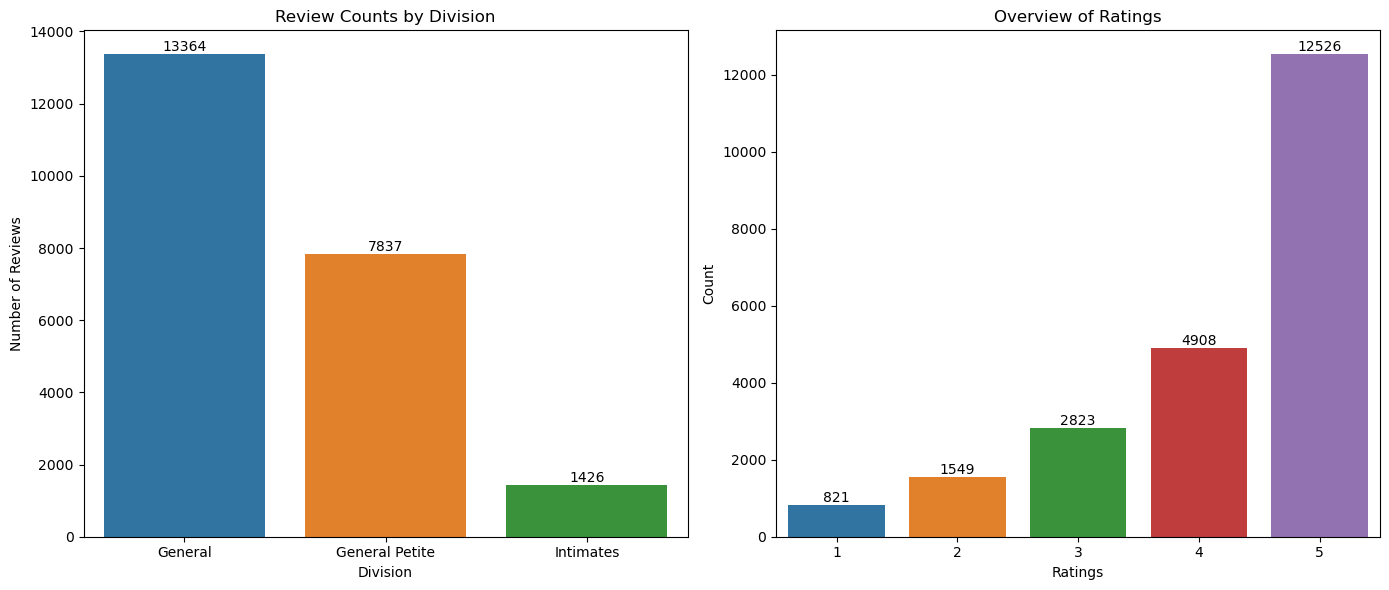

In [21]:
# Arranging data for visual analysis
divisions_reviewed = df['division_name'].value_counts().sort_index()
ratings_distribution = df['rating'].value_counts().sort_index()

# Setting up a visualization canvas with two panels
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Configured for a single-row, two-column layout

# Visualization 1: Review Count by Division
division_bar = sns.barplot(x=divisions_reviewed.index, y=divisions_reviewed, ax=axes[0])
axes[0].set_title('Review Counts by Division')
axes[0].set_xlabel('Division')
axes[0].set_ylabel('Number of Reviews')
# Adding value annotations to the first bar plot
for bar in axes[0].patches:
    axes[0].annotate(format(bar.get_height(), '.0f'), 
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                     ha='center', va='bottom')

# Visualization 2: Ratings Overview
ratings_bar = sns.barplot(x=ratings_distribution.index, y=ratings_distribution, ax=axes[1])
axes[1].set_title('Overview of Ratings')
axes[1].set_xlabel('Ratings')
axes[1].set_ylabel('Count')
# Annotation for the second plot
for bar in axes[1].patches:
    axes[1].annotate(format(bar.get_height(), '.0f'), 
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                     ha='center', va='bottom')

plt.tight_layout()  # Optimizes layout to prevent overlap
plt.show()  # Displays the plots

## Insights on Review Distribution and Ratings

In our analysis of customer reviews across different Divisions, notable differences emerge in both the volume of reviews and their ratings. The insights are summarized as follows:

### Review Counts by Division

- **General Division:** Receives the highest number of reviews at 13,364.
- **General Petite Division:** Follows with 7,837 reviews.
- **Intimates Division:** Has the fewest reviews, tallying up to 1,426.

This distribution indicates a greater engagement and possibly a broader product lineup within the General Division.

### Overview of Ratings

The ratings distribution across all divisions significantly leans towards higher satisfaction, delineated as follows:

- **5-star:** Dominates with 12,526 reviews, highlighting overall customer satisfaction.
- **4-star:** Holds 4,908 reviews, suggesting many customers found their purchases above average.
- **3-star:** With 2,823 reviews, indicates a moderate satisfaction level.
- **2-star:** Accounts for 1,549 reviews, reflecting some areas of improvement.
- **1-star:** The least, with 821 reviews, possibly highlighting specific grievances or product issues.

The preponderance of 4-star and 5-star ratings underscores a generally positive customer sentiment towards the products offered.

In [22]:
percentage_5_stars = (df['rating'] == 5).sum() * 100 / len(df)
print(f'\033[1m STARS RATINGS REPRESENT {percentage_5_stars:.2f}% OF THE DATAFRAME\033[0m')

 STARS RATINGS REPRESENT 55.36% OF THE DATAFRAME


### B. Ratings Distribution per Product Type (Class_name)

The analysis extends to exploring how ratings are distributed across different types of products, identified by their `class_name`. This investigation aims to discern patterns or trends in customer satisfaction relative to the specific product types offered within each division.

This nuanced view provides a more granular perspective on customer feedback, allowing for strategic adjustments in both product development and marketing initiatives.

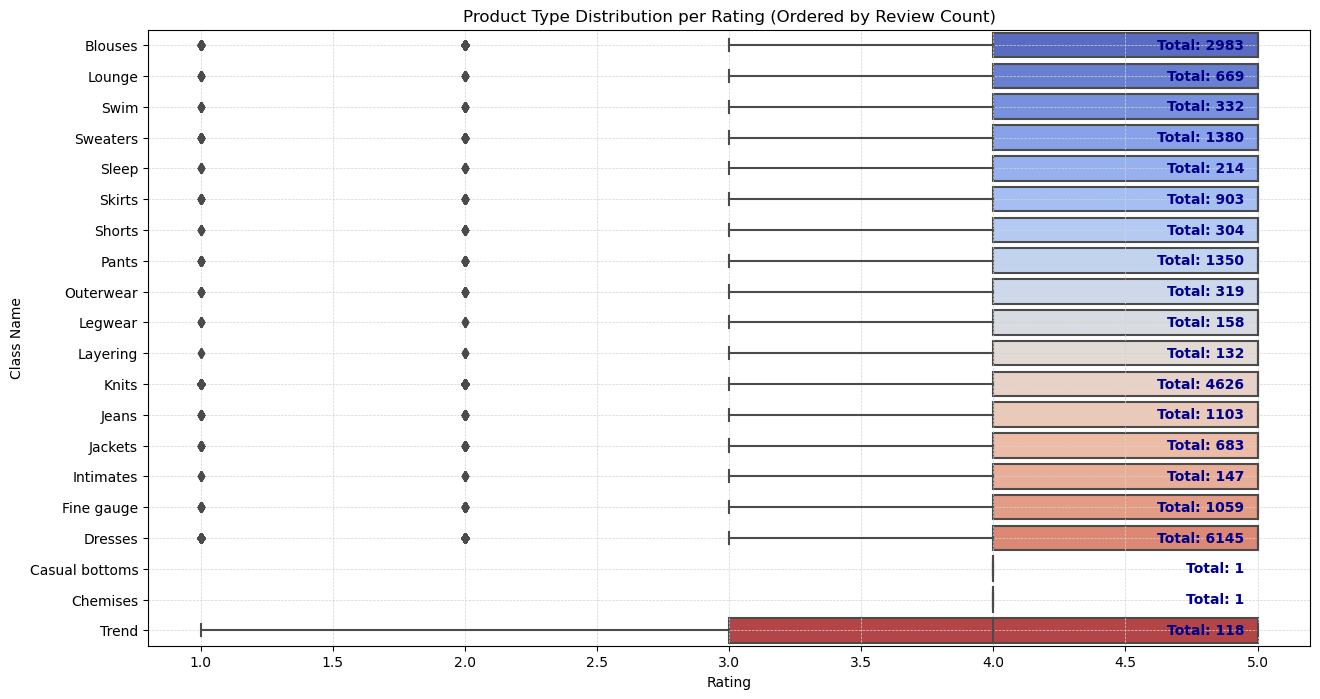

In [23]:
# Calculating median ratings for each class and sorting them
class_rating_medians = df.groupby('class_name')['rating'].median().sort_values(ascending=False)

# Sorting class names based on calculated medians
ordered_class_names = class_rating_medians.index.tolist()

# Setting up the visualization
plt.figure(figsize=(15, 8))
ax = sns.boxplot(x='rating', y='class_name', data=df, order=ordered_class_names, palette="coolwarm")

# Labels for the plot
plt.xlabel('Rating')
plt.ylabel('Class Name')

# Extending the x-axis limit for annotation space
x_limit = ax.get_xlim()[1]

# Annotating each row with the total number of reviews
for position, class_name in enumerate(ordered_class_names):
    review_count = df.loc[df['class_name'] == class_name, 'rating'].count()
    ax.text(x_limit - 0.25, position, f'Total: {review_count}', 
            verticalalignment='center', color='darkblue', fontweight='bold', horizontalalignment='right')

# Adding grid for better readability
plt.grid(True, which='both', color='lightgray', linestyle='--', linewidth=0.5)

# Customizing title with detailed description
plt.title('Product Type Distribution per Rating (Ordered by Review Count)')
plt.show()

### General Overview of Clothing Class Ratings
Despite the categories within divisions and departments, the aim here is to present a general overview of clothing ratings by class. The boxplot displayed offers insight into the distribution of ratings, facilitating the identification of outliers and classes with generally lower ratings. The bar graph to the right indicates the total number of reviews for each class.

### Rating Distribution and Outliers
The most frequent rating in this analysis is 5, which is the highest possible score. The distribution of ratings is left-skewed, suggesting that there is overall satisfaction with the majority of products, although there are a notable few outliers with ratings of 1 and 2.

### Observations of Specific Classes
The **Trend** category stands out as having significantly lower minimum rating values. For more detailed insights, a descriptive statistics table could be useful.

### Notable Characteristics
It is important to note that some classes, specifically Casual bottoms and Chemises, have a single review each. This limited feedback could impact the analysis and should be taken into consideration when interpreting the data.

In [24]:
df[(df['class_name'] == 'Casual bottoms') | (df['class_name'] == 'Chemises')]

,clothing_id,age,title,review_text,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name
12397,45,26,"Cute pants, but short.","These pants have a really cute design. however, they are a bit short (and i'm only 5'4""). i'm still happy i purchased them, but i thought i was purchasing full length pants (as shown on the model) and not capris.",4,True,0,General,Bottoms,Casual bottoms
13430,10,38,Comfy and cute,"This dress is comfortable and a great piece to travel with. goes with ballet flats, sandals, to ankle boots.",4,True,0,Intimates,Intimates,Chemises


### About Casual Bottoms
In this case, there is only one pair of pants, which should be included in the 'Pants' Class.

### Regarding Chemises
It appears to be a misclassification from the source. The review describes shoes that complement the product, in this case, a dress, implying that it is intended for going out rather than being a part of the Intimates category.

In [25]:
# Isolate the specific product classes for reassignment
bottoms_casual = df[df['class_name'] == 'Casual bottoms']
nightwear_chemises = df[df['class_name'] == 'Chemises']

# Combine indices from both subsets for bulk updating
combined_indices = bottoms_casual.index.tolist() + nightwear_chemises.index.tolist()

# Define the new class names intended for replacement
revised_class_names = ['Pants', 'Dresses']

# Iterate through the indices to update class names accordingly
for idx, specific_index in enumerate(combined_indices):
    replacement_class = revised_class_names[0] if idx < len(bottoms_casual) else revised_class_names[1]
    df.loc[specific_index, 'class_name'] = replacement_class

### Two Cases Successfully Recategorized

In [26]:
# Grouping the data by 'class_name' and calculating descriptive statistics for 'rating'
rating_summary = df.groupby('class_name')['rating'].describe()

# Filtering out groups with no ratings
rating_summary_with_reviews = rating_summary[rating_summary['count'] > 0]

# Sorting the summary data based on the mean rating
sorted_rating_summary = rating_summary_with_reviews.sort_values('mean')

# Displaying the sorted summary data
sorted_rating_summary

,count,mean,std,min,25%,50%,75%,max
class_name,,,,,,,,
Trend,118.0,3.838983,1.313769,1.0,3.0,4.0,5.0,5.0
Dresses,6146.0,4.138789,1.127554,1.0,4.0,5.0,5.0,5.0
Blouses,2983.0,4.142809,1.140846,1.0,4.0,5.0,5.0,5.0
Knits,4626.0,4.145698,1.121563,1.0,4.0,5.0,5.0,5.0
Sweaters,1380.0,4.168841,1.134104,1.0,4.0,5.0,5.0,5.0
Swim,332.0,4.171687,1.125392,1.0,4.0,5.0,5.0,5.0
Outerwear,319.0,4.181818,1.129165,1.0,4.0,5.0,5.0,5.0
Skirts,903.0,4.229236,1.095014,1.0,4.0,5.0,5.0,5.0
Fine gauge,1059.0,4.237960,1.079117,1.0,4.0,5.0,5.0,5.0


| Class   | Total Opinions | Average |
|---------|----------------|---------|
| Trend   | 118            | 3.83    |
| Others  | Varies         | 4.13-4.34 |
| Minimum | N/A            | 1       |

In [27]:
# Focusing on entries under the 'Trend' class within the dataset
trend_class_df = df[df['class_name'] == 'Trend']

# Calculating the number of unique clothing items in the 'Trend' category
distinct_clothing_count = trend_class_df['clothing_id'].nunique()

# Counting how many reviews exist for the 'Trend' category
review_count_for_trend = trend_class_df['rating'].count()

# Outputting the findings
print(f"Number of unique clothing items in 'Trend' class: {distinct_clothing_count}")
print(f"Total number of reviews for 'Trend' class items: {review_count_for_trend}")

Number of unique clothing items in 'Trend' class: 38
Total number of reviews for 'Trend' class items: 118


### Analyzing Distribution of Ratings in the Trend Class

As observed earlier, the typical distribution of ratings in the dataframe shows that 50% of reviews have a rating of 5.0, with a mean rating exceeding 4.13. In order to identify the locations of the lowest ratings within the Trend class, I am grouping the 118 reviews by the 42 unique products (identified by *clothing_id*) belonging to this class. Subsequently, I will generate a boxplot, filtered by a mean rating of 4.13, to reveal any non-standard distribution.


In [28]:
# Analyzing 'Trend' class items for their rating descriptions per clothing item
ratings_by_clothing = trend_class_df.groupby('clothing_id')['rating'].describe()

# Selecting items with an average rating below 4.13
below_average_ratings = ratings_by_clothing[ratings_by_clothing['mean'] < 4.13]

# Sorting these items by their mean rating
sorted_below_average = below_average_ratings.sort_values('mean')

# Counting the total number of unique clothing items with mean ratings below 4.13
unique_items_below_average = sorted_below_average.shape[0]

# Summing up all review counts for these items
total_reviews_below_average = sorted_below_average['count'].sum()

# Displaying the results
print(f"'Trend' class items with an average rating below 4.13 - Unique Clothing IDs: {unique_items_below_average}")
print(f"'Trend' class items with an average rating below 4.13 - Total Reviews: {total_reviews_below_average}")

'Trend' class items with an average rating below 4.13 - Unique Clothing IDs: 20
'Trend' class items with an average rating below 4.13 - Total Reviews: 68.0


### Review Distribution by Age

With a total of 20 products, representing 57% of the total Trend reviews, the mean rating falls below 4.13. This indicates a lower average rating for this class compared to the rest. The reasons for this discrepancy will be explored in the Sentiment Analysis section.

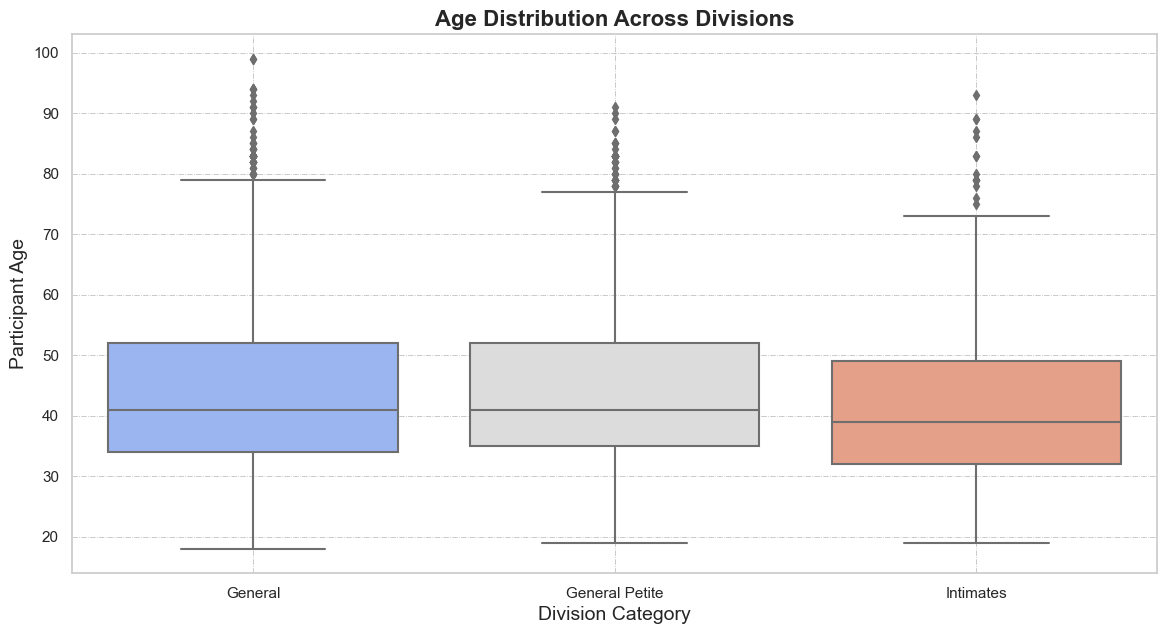

In [29]:
# Adjusting figure size and utilizing a different style for the plot
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))

# Creating a boxplot with altered aesthetics for a fresh look
sns.boxplot(data=df, x='division_name', y='age', palette='coolwarm')

# Updating the title and labels with a different phrasing
plt.title('Age Distribution Across Divisions', fontsize=16, fontweight='bold')
plt.xlabel('Division Category', fontsize=14)
plt.ylabel('Participant Age', fontsize=14)

# Customizing the grid for better visualization contrast
plt.grid(True, color='silver', linestyle='-.', linewidth=0.6, which='major', zorder=0)

# Displaying the plot
plt.show()

### Age Distribution Insights

Upon analyzing the age distribution across the different divisions, several key insights were garnered:

- **General Division:** The median age is 41 years, with an outlier of 100 years old, indicating a wide range of ages within this division.

- **General Petite Division:** While sharing the same median age as the General division, General Petite's oldest outlier is notably younger at 91 years old.

- **Intimates Division:** Distinctly, the Intimates division caters to a generally younger audience, with a mean age of 39. Additionally, 75% of participants in this division (Q3) are under the age of 50, making it the youngest division of the three.


In [30]:
# Aggregating data with emphasis on product ratings
product_ratings_summary = df.groupby('clothing_id').agg(
    average_rating=('rating', 'mean'), # Mean rating for products
    total_ratings=('rating', 'count'), # Total count of ratings per product
    ratings_at_minimum=('rating', lambda y: (y == 1).sum()) # Count of the lowest rating (1)
)

# Display the aggregated summary
product_ratings_summary

,average_rating,total_ratings,ratings_at_minimum
clothing_id,,,
1,4.000000,3,0
2,4.000000,1,0
3,5.000000,1,0
4,5.000000,1,0
5,5.000000,1,0
...,...,...,...
1200,3.000000,1,0
1202,4.333333,9,0
1203,4.428571,7,0


### Identifying Low-Performing Products Through Customer Ratings

Our analysis aims to pinpoint products that may require further review, improvement, or discontinuation. Leveraging the pandas library in Python, we focused on products that have received more than one rating of 1, indicating a possible consistent issue or dissatisfaction among customers. The intention is to filter these products and then list the 100 with the lowest average ratings for a targeted approach to quality improvement.

#### Methodology

The dataset, presumably containing product IDs, ratings, and other relevant information, is processed as follows:

1. **Filtering:** Initially, we filter the dataset to include only products that have received at least one '1' rating multiple times. This step is crucial to focus on products with potentially critical issues as indicated by customer feedback.

2. **Sorting:** Using the `df.nsmallest()` function from pandas, we then sort these filtered products by their average rating in ascending order. The function allows us to directly obtain the 100 products with the lowest average ratings, ensuring our analysis is targeted and manageable.

3. **Analysis:** These 100 products are then subjected to a detailed review, assessing customer comments, return rates, and possible quality issues. This step is not just about identifying low-performing products but understanding the underlying reasons for their ratings.

#### Expected Outcomes

- **Product Improvement:** Insights gained from this analysis will inform product design and quality assurance processes, leading to improvements in product offerings.

- **Customer Satisfaction:** Addressing these concerns directly can enhance overall customer satisfaction, as it demonstrates responsiveness to customer feedback.

- **Inventory Management:** Products identified as consistently underperforming may be phased out or replaced, optimizing inventory and focusing on higher-performing items.

#### Conclusion

This targeted approach, filtering by products that have received more than one rating of '1' and identifying those with the lowest average ratings, enables a focused and data-driven strategy to elevate product quality and customer satisfaction.

In [31]:
# Filtering products with more than one lowest rating
products_above_one_lowest_rating = product_ratings_summary[product_ratings_summary['ratings_at_minimum'] > 1]

# Setting the number of products to select
TopN = 100

# Identifying the products with the lowest average ratings, considering only those with more than one lowest rating
products_with_lowest_avg_rating = products_above_one_lowest_rating.nsmallest(TopN, 'average_rating')

# Displaying the list of products with the lowest average ratings
products_with_lowest_avg_rating

,average_rating,total_ratings,ratings_at_minimum
clothing_id,,,
973,1.000000,2,2
569,1.800000,5,2
588,2.000000,4,2
229,2.181818,11,4
1039,2.888889,9,2
...,...,...,...
1059,4.285714,287,8
1009,4.289157,83,3
850,4.290123,324,8


# 5. Sentiment Analysis

## 5.1 Overview of TextBlob and VADER Tools

As mentioned in the introduction, TextBlob and Vader will be compared to enrich the analysis. First, I'm running a simple test to know how they work.

### The Previous Table

The previous table shows data grouped by product, including average rating, total reviews per product, and a count of total '1-star' reviews. These results will be explored further in the Business Insights section.

In [32]:
# Initialize the VADER sentiment intensity analyzer
analyzer = SentimentIntensityAnalyzer()

# Define the sample text for analysis
sample_text = "This is a great case study on the effectiveness of VADER for analyzing sentiments."

# Calculate sentiment scores using VADER
sentiment_scores = analyzer.polarity_scores(sample_text)

# Displaying the sentiment scores
print(f"Positive Score: {sentiment_scores['pos']}")
print(f"Negative Score: {sentiment_scores['neg']}")
print(f"Neutral Score: {sentiment_scores['neu']}")
print(f"Overall Sentiment Score: {sentiment_scores['compound']}")

Positive Score: 0.24
Negative Score: 0.0
Neutral Score: 0.76
Overall Sentiment Score: 0.6249


In [33]:
# Create a TextBlob object for sentiment analysis
blob = TextBlob("This is a great case study on the effectiveness of TextBlob for analyzing sentiments.")

# Extract sentiment analysis results
blob_sentiment_result = blob.sentiment

# Retrieve polarity and subjectivity scores from the analysis
blob_polarity_score = blob_sentiment_result.polarity
blob_subjectivity_score = blob_sentiment_result.subjectivity

# Output the sentiment analysis scores for review
print(f"TextBlob Analysis - Polarity Score: {blob_polarity_score}")
print(f"TextBlob Analysis - Subjectivity Score: {blob_subjectivity_score}")

TextBlob Analysis - Polarity Score: 0.8
TextBlob Analysis - Subjectivity Score: 0.75


In the following illustrations, we utilize two distinct sentiment analysis tools to evaluate sentiment scores for two similar statements.

**TextBlob:** TextBlob offers polarity and subjectivity scores. In Example 1, the polarity score is 0.8, indicative of a positive sentiment, with a subjectivity score of 0.75, suggesting a moderate level of subjectivity.

**Vader:** Vader furnishes positive, negative, neutral, and compound scores. In Example 2, the compound score stands at 0.6249, implying a positive sentiment. Notably, the neutal score (0.76) is the highest, signifying a neutral sentiment.

Both tools generally concur on the sentiment of the provided statements, categorizing them as positive. Nevertheless, the precise numerical values may vary due to the distinct sentiment analysis algorithms and scoring mechanisms employed by each tool. Moreover, TextBlob offers a subjectivity score, an aspect absent in VADER's output.

## 5.2 Integration of Sentiment Analysis in the Dataset
### A. Adding Textblob and Vader to the dataframe

In [34]:
# Preparing TextBlob objects for each review in the dataset
desc_blob = [TextBlob(text) for text in df['review_text']]

# Incorporating TextBlob sentiment analysis results into the dataframe
df['tb_pol'] = [blob.sentiment.polarity for blob in desc_blob]
df['tb_subj'] = [blob.sentiment.subjectivity for blob in desc_blob]

# Embedding VADER sentiment analysis scores into the dataframe
df['compound'] = [analyzer.polarity_scores(text)['compound'] for text in df['review_text']]
df['neg'] = [analyzer.polarity_scores(text)['neg'] for text in df['review_text']]
df['neu'] = [analyzer.polarity_scores(text)['neu'] for text in df['review_text']]
df['pos'] = [analyzer.polarity_scores(text)['pos'] for text in df['review_text']]

### Displaying a selection of columns to understand behavior

In [35]:
# Defining columns to include in the output
focus_columns = ['clothing_id', 'review_text', 'rating', 'recommended_ind', 'tb_pol',
                 'tb_subj', 'compound', 'neg', 'neu', 'pos']

# Indicating which columns to apply special formatting to
highlight_cols = ['rating', 'compound', 'tb_pol']

# Styling the dataframe to emphasize certain metrics
custom_styled_df = df[focus_columns].head(10).style.hide(axis = "index") \
                    .format({"tb_pol": "{:.2%}",
                             "tb_subj": "{:.2%}",
                             "compound": "{:.2f}",
                             "neg": "{:.2f}",
                             "neu": "{:.2f}",
                             "pos": "{:.2f}"}) \
                    .background_gradient(cmap='coolwarm', subset=highlight_cols)

custom_styled_df

clothing_id,review_text,rating,recommended_ind,tb_pol,tb_subj,compound,neg,neu,pos
767,Absolutely wonderful - silky and sexy and comfortable,4,True,63.33%,93.33%,0.89,0.00,0.32,0.68
1080,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,True,33.96%,72.50%,0.97,0.00,0.70,0.30
1077,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,False,7.37%,35.63%,0.92,0.03,0.83,0.14
1049,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,True,55.00%,62.50%,0.57,0.21,0.40,0.40
847,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,True,51.29%,56.88%,0.93,0.00,0.70,0.30
1080,"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.",2,False,17.87%,53.31%,0.94,0.00,0.86,0.14
858,"I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and turns out it mathced everythiing i was trying on with it prefectly. it is a little baggy on me and hte xs is hte msallet size (bummer, no petite). i decided to jkeep it though, because as i said, it matvehd everything. my ejans, pants, and the 3 skirts i waas trying on (of which i ]kept all ) oops.",5,True,13.38%,60.78%,0.68,0.04,0.87,0.09
858,"I ordered this in carbon for store pick up, and had a ton of stuff (as always) to try on and used this top to pair (skirts and pants). everything went with it. the color is really nice charcoal with shimmer, and went well with pencil skirts, flare pants, etc. my only compaint is it is a bit big, sleeves are long and it doesn't go in petite. also a bit loose for me, but no xxs... so i kept it and wil ldecide later since the light color is already sold out in hte smallest size...",4,True,17.16%,49.62%,-0.09,0.04,0.91,0.05
1077,I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and feminine with the usual retailer flair for style.,5,True,0.25%,38.00%,0.72,0.00,0.84,0.16
1077,"I'm 5""5' and 125 lbs. i ordered the s petite to make sure the length wasn't too long. i typically wear an xs regular in retailer dresses. if you're less busty (34b cup or smaller), a s petite will fit you perfectly (snug, but not tight). i love that i could dress it up for a party, or down for work. i love that the tulle is longer then the fabric underneath.",5,True,20.42%,46.73%,0.87,0.05,0.77,0.18


### Understanding Sentiment Analysis Metrics

Both polarity (from Textblob) and compound score (from Vader) are metrics aimed at capturing the overall sentiment of a text, albeit with slight variations in their approaches. As they both aim to convey similar sentiments, it's insightful to explore how each correlates with explicit ratings.

#### 1. Polarity (Textblob):
- Ranges from -1 to 1.
- Closer to 1 indicates positive sentiment, closer to -1 indicates negative sentiment, and around 0 suggests neutral sentiment.

#### 2. Compound Score (Vader):
- Also ranges from -1 to 1.
- A positive score implies positive sentiment, a negative score implies negative sentiment, and scores near 0 suggest neutrality.
- VADER, tailored for social media text, accounts for intensifiers, emojis, and other nuances.

### Analysis of Sentiment Metrics against Ratings
At this stage of the project, we can visualize the distribution of user ratings (1:5) alongside sentiment scores (-1:1) generated by both Textblob and Vader. This exploration indicates that the two tools apply distinct thresholds in identifying positive and negative sentiments.

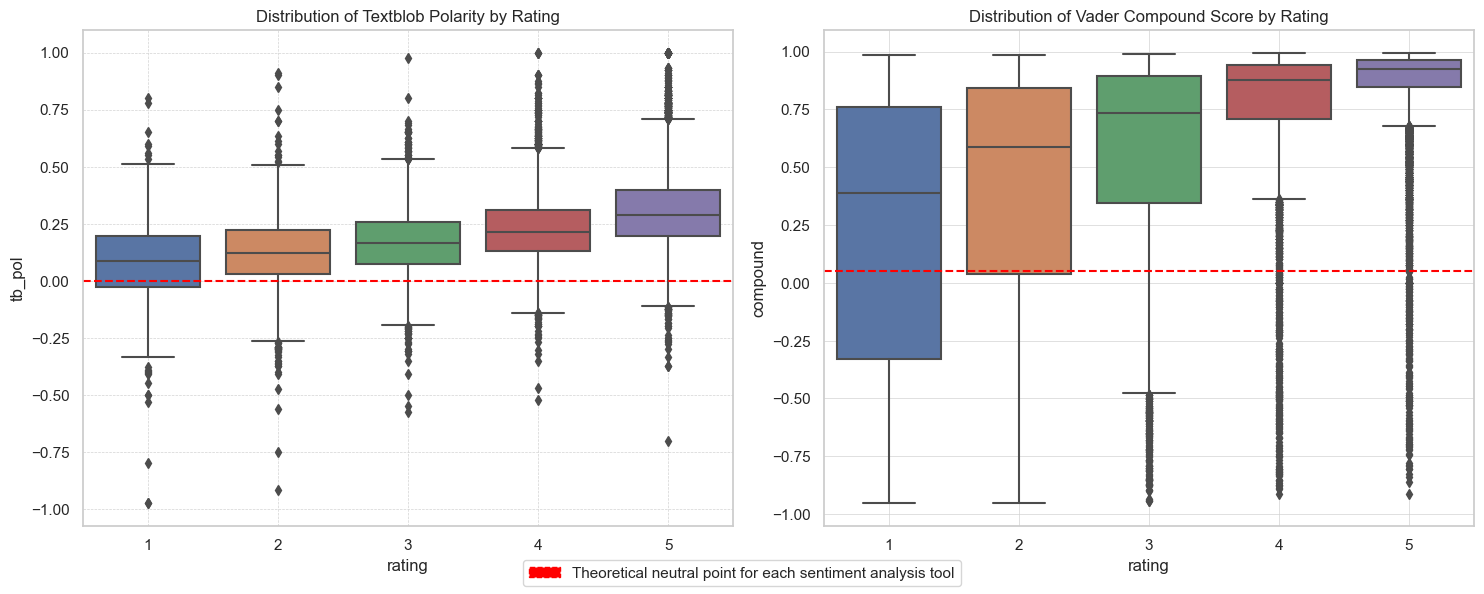

In [36]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['rating'], y=df['tb_pol'])
plt.axhline(0.00, color='red', linestyle='--')  # adds horizontal line at y=0.05 for neutral point

plt.title('Distribution of Textblob Polarity by Rating')
plt.grid(True, color='lightgrey', linestyle='--', linewidth=0.5, zorder=0) 

plt.subplot(1, 2, 2)
sns.boxplot(x=df['rating'], y=df['compound'])

plt.axhline(0.05, color='red', linestyle='--')  #adds horizontal line at y=0.05 for neutral point
plt.title('Distribution of Vader Compound Score by Rating')
plt.grid(True, color='lightgrey', linestyle='-', linewidth=0.5, which='both', zorder=0) 

plt.subplots_adjust(bottom=0.2) #subplot layout adjusted to make space for the legend below

red_line = mpatches.Patch(color='red', linestyle='--', label='Theoretical neutral point for each sentiment analysis tool')

plt.figlegend(handles=[red_line], loc='lower center', ncol=1)

plt.tight_layout()
plt.show()

In [37]:
tb_medians = df.groupby(['rating'])['tb_pol'].median() 
vader_medians = df.groupby(['rating'])['compound'].median()

print("Textblob Median Sentiment Scores by Rating:")
for rating, median in tb_medians.items():
    print(f"Rating {rating}: {median:.2f}")

print("\nVader Median Sentiment Scores by Rating:")
for rating, median in vader_medians.items():
    print(f"Rating {rating}: {median:.2f}")

Textblob Median Sentiment Scores by Rating:
Rating 1: 0.09
Rating 2: 0.12
Rating 3: 0.16
Rating 4: 0.21
Rating 5: 0.29

Vader Median Sentiment Scores by Rating:
Rating 1: 0.39
Rating 2: 0.59
Rating 3: 0.73
Rating 4: 0.88
Rating 5: 0.93


## 5.3 Determining Sentiment Thresholds
### In theory, Vader categorizes sentiment scores above 0.05 as positive, below -0.05 as negative, and scores between -0.05 and 0.05 as neutral. Textblob, however, treats scores above 0 as positive, below 0 as negative, and a score of 0 as neutral. This demonstrates a variance in sentiment classification between the two tools, suggesting a need for threshold recalibration based on empirical user rating data for consistency.

### Upon examining the sentiment scores associated with a neutral user rating (typically a 3 out of 5), we can recalibrate the thresholds for both Textblob and Vader to better match the dataset's sentiment distribution. By observing the median sentiment scores corresponding to a rating of 3, which we consider neutral, we determine new neutral sentiment scores: 0.16 for Textblob and 0.73 for Vader, based on the provided polarity distribution boxplot.

## 5.4 Sentiment Classification
### The objective of the subsequent code sections will be to categorize sentiment results from both Textblob and Vader. This classification will transform Textblob's polarity, Vader's compound, and user ratings into three sentiment categories: Positive, Negative, and Neutral.

The data supporting these recalibrations are:

Textblob Median Sentiment Scores by Rating:
- Rating 1: 0.09
- Rating 2: 0.12
- Rating 3: 0.16
- Rating 4: 0.21
- Rating 5: 0.29

Vader Median Sentiment Scores by Rating:
- Rating 1: 0.39
- Rating 2: 0.59
- Rating 3: 0.73
- Rating 4: 0.88
- Rating 5: 0.93

In [38]:
#VADER INTO SENTIMENT
def find_sentiment_vader(compound_score):
    sentiment = "NEUTRAL"  # Default sentiment
    if compound_score > 0.73:
        sentiment = "POSITIVE"
    elif compound_score < 0.73:
        sentiment = "NEGATIVE"
    return sentiment  
    
#TEXTBLOB INTO SENTIMENT
def find_sentiment_textblob(tb_pol):
    sentiment = "NEUTRAL"  # Default sentiment
    if tb_pol > 0.16:
        sentiment = "POSITIVE"
    elif tb_pol < 0.16:
        sentiment = "NEGATIVE"
    return sentiment

#RATINGS INTO SENTIMENT
def find_sentiment_rating(rate):
    sentiment = "NEUTRAL"  # Default sentiment
    if rate > 3:
        sentiment = "POSITIVE"
    elif rate < 3:
        sentiment = "NEGATIVE"
    return sentiment

In [39]:
df['vader_sentiment'] = df['compound'].apply(find_sentiment_vader)

df['tb_sentiment'] = df['tb_pol'].apply(find_sentiment_textblob)

df['rating_sentiment'] = df['rating'].apply(find_sentiment_rating)

In [40]:
df

,clothing_id,age,title,review_text,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name,tb_pol,tb_subj,compound,neg,neu,pos,vader_sentiment,tb_sentiment,rating_sentiment
0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,True,0,Intimates,Intimates,Intimates,0.633333,0.933333,0.8932,0.000,0.319,0.681,POSITIVE,POSITIVE,POSITIVE
1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,True,4,General,Dresses,Dresses,0.339583,0.725000,0.9729,0.000,0.702,0.298,POSITIVE,POSITIVE,POSITIVE
2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,False,0,General,Dresses,Dresses,0.073675,0.356294,0.9208,0.025,0.831,0.144,POSITIVE,NEGATIVE,NEUTRAL
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,True,0,General Petite,Bottoms,Pants,0.550000,0.625000,0.5727,0.207,0.396,0.397,NEGATIVE,POSITIVE,POSITIVE
4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,True,6,General,Tops,Blouses,0.512891,0.568750,0.9291,0.000,0.700,0.300,POSITIVE,POSITIVE,POSITIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a great price! it's very easy to slip on and has a very flattering cut and color combo.,5,True,0,General Petite,Dresses,Dresses,0.552667,0.710000,0.9152,0.060,0.582,0.358,POSITIVE,POSITIVE,POSITIVE
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stretchy, shiny material. cut is flattering and drapes nicely. i only found one button to close front... looked awkward. nice long sleeves.\nnot for me but maybe for others. just ok.",3,True,0,General Petite,Tops,Knits,0.091667,0.708333,0.3919,0.069,0.798,0.133,NEGATIVE,NEGATIVE,NEUTRAL
23483,1104,31,"Cute, but see through","This fit well, but the top was very see through. this never would have worked for me. i'm glad i was able to try it on in the store and didn't order it online. with different fabric, it would have been great.",3,False,1,General Petite,Dresses,Dresses,0.414286,0.596429,0.9343,0.000,0.709,0.291,POSITIVE,POSITIVE,NEUTRAL
23484,1084,28,"Very cute dress, perfect for summer parties and we","I bought this dress for a wedding i have this summer, and it's so cute. unfortunately the fit isn't perfect. the medium fits my waist perfectly, but was way too long and too big in the bust and shoulders. if i wanted to spend the money, i could get it tailored, but i just felt like it might not be worth it. side note - this dress was delivered to me with a nordstrom tag on it and i found it much cheaper there after looking!",3,True,2,General,Dresses,Dresses,0.322222,0.577778,0.6692,0.061,0.830,0.109,NEGATIVE,POSITIVE,NEUTRAL


## 5.5 Classification Stats
### Once the classification have been applied to the dataframe, the following turns them into insightful results.

In [41]:
def evaluate_sentiment_agreement(row):
    # Evaluates whether the sentiments from TextBlob and Vader agree with the rating-based sentiment
    return {
        'textblob_agrees': row['tb_sentiment'] == row['rating_sentiment'],
        'vader_agrees': row['vader_sentiment'] == row['rating_sentiment']
    }

# Applying the function across the DataFrame to create a new comparison DataFrame
sentiment_comparison = pd.DataFrame([evaluate_sentiment_agreement(row) for _, row in df.iterrows()])

# Structuring results for easy reading and analysis
comparison_results = {
    'TextBlob': {
        'agreements': sentiment_comparison['textblob_agrees'].sum(),
        'disagreements': (~sentiment_comparison['textblob_agrees']).sum(),
        'precision': sentiment_comparison['textblob_agrees'].mean() * 100
    },
    'VADER': {
        'agreements': sentiment_comparison['vader_agrees'].sum(),
        'disagreements': (~sentiment_comparison['vader_agrees']).sum(),
        'precision': sentiment_comparison['vader_agrees'].mean() * 100
    }
}

# Displaying the comparative analysis results
for analyzer_name, metrics in comparison_results.items():
    print(f"{analyzer_name} Precision: {metrics['precision']:.2f}%")
    print(f"Agreements: {metrics['agreements']}")
    print(f"Disagreements: {metrics['disagreements']}\n")

TextBlob Precision: 66.56%
Agreements: 15060
Disagreements: 7567

VADER Precision: 71.03%
Agreements: 16072
Disagreements: 6555



In [42]:
comparison_results

{'TextBlob': {'agreements': 15060,
  'disagreements': 7567,
  'precision': 66.55765236222211},
 'VADER': {'agreements': 16072,
  'disagreements': 6555,
  'precision': 71.03018517700093}}

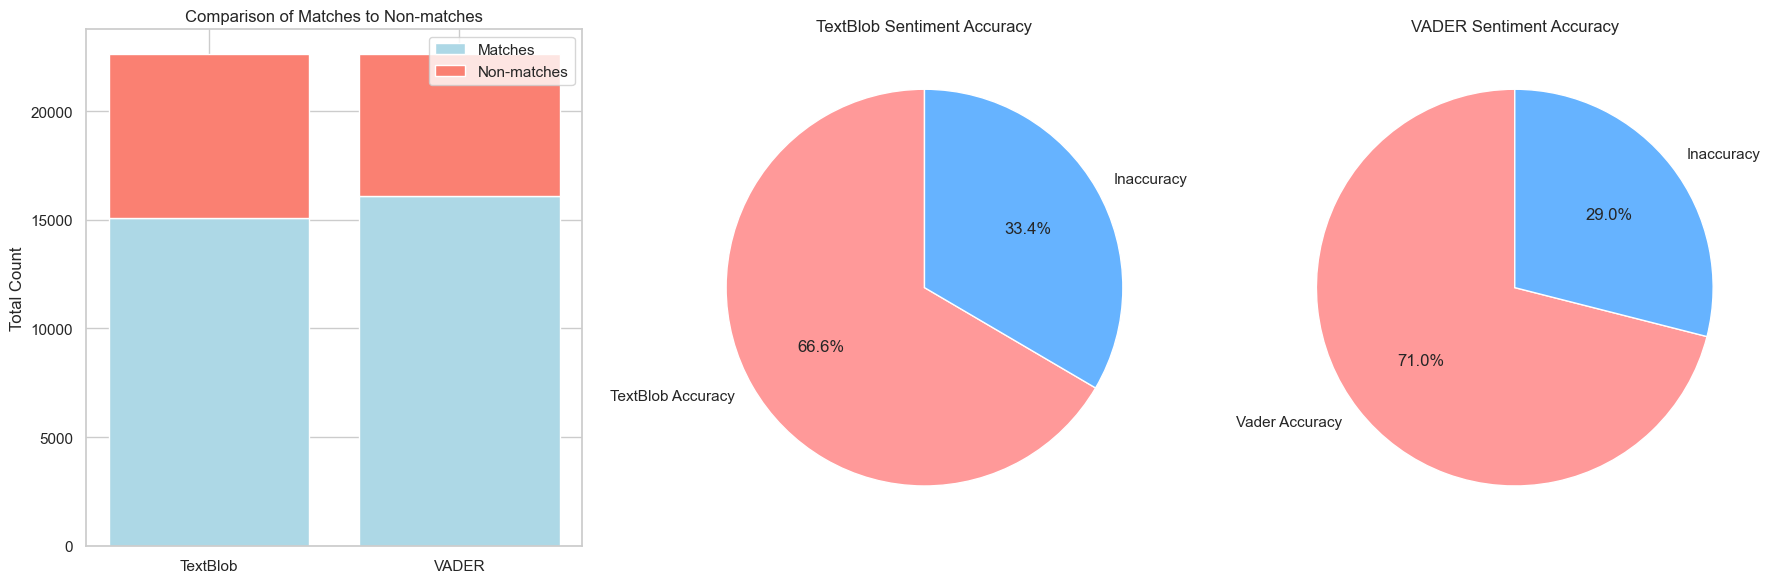

In [43]:

# Extracting data for visualization
analyzers = list(comparison_results.keys())
accuracy_scores = [comparison_results[analyzer]['precision'] for analyzer in analyzers]
total_matches = [comparison_results[analyzer]['agreements'] for analyzer in analyzers]
total_non_matches = [comparison_results[analyzer]['disagreements'] for analyzer in analyzers]

# Creating a subplot layout: 1 row, 3 cols
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Stacked Bar Plot for Matches vs Non-matches
colors_for_stacks = ['lightblue', 'salmon']  # New color scheme for clarity
axs[0].bar(analyzers, total_matches, color=colors_for_stacks[0], label='Matches')
axs[0].bar(analyzers, total_non_matches, bottom=total_matches, color=colors_for_stacks[1], label='Non-matches')
axs[0].set_title('Comparison of Matches to Non-matches')
axs[0].set_ylabel('Total Count')
axs[0].legend()

# Adjusting Pie Chart Visuals
pie_colors = ['#ff9999','#66b3ff']  # New Pie chart color scheme
# TextBlob Pie Chart
axs[1].pie([accuracy_scores[0], 100-accuracy_scores[0]], labels=['TextBlob Accuracy', 'Inaccuracy'], colors=pie_colors, autopct='%1.1f%%', startangle=90)
axs[1].set_title('TextBlob Sentiment Accuracy')

# Vader Pie Chart
axs[2].pie([accuracy_scores[1], 100-accuracy_scores[1]], labels=['Vader Accuracy', 'Inaccuracy'], colors=pie_colors, autopct='%1.1f%%', startangle=90)
axs[2].set_title('VADER Sentiment Accuracy')

plt.tight_layout()  # Adjust the layout to not overlap
plt.show()

# Sentiment Analysis Accuracy Comparison

The provided visualizations compare the accuracy of two sentiment analysis tools, **VADER** and **TextBlob**. The comparison is based on the rate of correct sentiment detection.

## Key Findings:

### VADER's Accuracy:
- The right-most pie chart indicates that VADER achieves an accuracy rate of **71%**.

### TextBlob's Accuracy:
- The center pie chart shows TextBlob with a lower accuracy rate of **66.6%**.

## Numeric Difference in Accuracy:

- The left-most bar chart highlights the total counts of matches and non-matches for both tools.
- VADER exceeds TextBlob by more than 1000 cases in terms of correctly identifying sentiment.

## Coincidence in Cases:

- Both VADER and TextBlob are likely to use a form of natural language processing to analyze sentiment, potentially leading to overlaps in their correctly identified cases.
- The specific cases where either tool misjudges the sentiment might involve nuances such as sarcasm, idioms, or context that are challenging for sentiment analysis algorithms.

## Validation Test:



In [44]:
# Validation check to ensure all reviews are correctly accounted for
total_textblob_counts = comparison_results['TextBlob']['agreements'] + comparison_results['TextBlob']['disagreements']
total_vader_counts = comparison_results['VADER']['agreements'] + comparison_results['VADER']['disagreements']

if (total_textblob_counts == len(df)) and (total_vader_counts == len(df)):
   print("Validation successful: Each review has been processed.")
else:
   print("Validation failed: Discrepancy in processed review counts.")

Validation successful: Each review has been processed.


## 5.6 Correlation with Ratings

In [45]:
print(f"Correlation between rating and TextBlob polarity: {round(df['rating'].corr(df['tb_pol']),2)}")
print(f"Correlation between rating and VADER compound: {round(df['rating'].corr(df['compound']),2)}")

Correlation between rating and TextBlob polarity: 0.39
Correlation between rating and VADER compound: 0.47


#### Correlation between User Ratings and Sentiment Metrics

Since both metrics have a positive correlation, it means that as user ratings increase, both sentiment metrics tend to increase. Vader has a higher correlation with ratings (0.47) compared to Textblob (0.39). This suggests that Vader is more accurate at predicting the rating than Textblob.

These results are aligned with the sentiment classification.

Next, we will have a deeper focus on which cases the results from both tools coincide, and which are the cases where none of the tools could provide an accurate result. For this, we first run a function that shows us how accurate both the tools are when either one of them identifies the correct rating, compared to when neither of them succeeds in predicting the actual rating. Then, to find out what’s gone wrong in the latter cases, we show a distribution of ratings where neither of the tools got it right.

In [46]:
def classify_accurate(row):
    if row['rating_sentiment'] == 'POSITIVE' and (row['tb_sentiment'] == 'POSITIVE' or row['vader_sentiment'] == 'POSITIVE'):
        return 'accurate'
    elif row['rating_sentiment'] == 'NEGATIVE' and (row['tb_sentiment'] == 'NEGATIVE' or row['vader_sentiment'] == 'NEGATIVE'):
        return 'accurate'
    else:
        return 'no_accurate'

df['accurate_type'] = df.apply(classify_accurate, axis=1)

accurate_count = df['accurate_type'].value_counts().get('accurate', 0)
no_accurate_count = df['accurate_type'].value_counts().get('no_accurate', 0)

total_reviews = len(df)

print(f"Accuracy by at least one tool: {accurate_count / total_reviews * 100:.2f}%")
print(f"Non accurate by any of the tools: {no_accurate_count / total_reviews * 100:.2f}%")

Accuracy by at least one tool: 79.00%
Non accurate by any of the tools: 21.00%


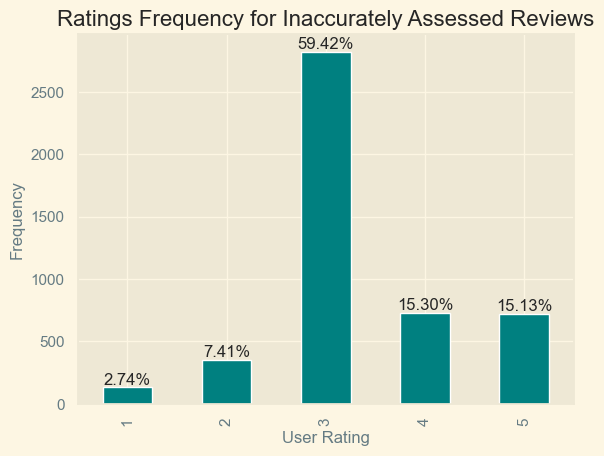

In [47]:
# Filtering DataFrame for specific conditions
accurate_reviews = df[df['accurate_type'] == 'accurate']  # Reviews flagged as accurate
inaccurate_reviews = df[df['accurate_type'] == 'no_accurate']  # Reviews flagged as inaccurate

# Generating counts of ratings only within the inaccurately flagged reviews
inaccurate_rating_counts = inaccurate_reviews['rating'].value_counts().sort_index()
overall_total = inaccurate_rating_counts.sum()  # Total count for normalization

# Plot customization for a clear visual representation
styles = plt.style.available
plt.style.use(styles[0])  # Choose the first available style for a fresh look
inaccurate_rating_counts.plot(kind='bar', color='teal')  # Using 'teal' color for visual distinctiveness
plt.title('Ratings Frequency for Inaccurately Assessed Reviews')
plt.xlabel('User Rating')
plt.ylabel('Frequency')

# Adding percentage labels on each bar for better understanding of distribution
for idx, count in enumerate(inaccurate_rating_counts):
    pct = f'{(count / overall_total) * 100:.2f}%'  # Calculating percentage
    plt.text(idx, count, pct, ha='center', va='bottom')

plt.show()

### Neutral Reviews as a Limitation of Sentiment Analysis Tools
A significant portion of reviews that were inaccurately rated by the sentiment analysis tools received a 3-star rating from clients, which classifies them as Neutral. This highlights a clear limitation in the tools' capabilities, as they struggle with reviews that do not explicitly express strong positive or negative sentiments.

### Word Count Impact on Classification Accuracy
Additionally, the length of the review, or the number of words it contains, may also play a role in the incorrect classifications observed. Reviews of varying lengths could introduce complexities that affect the tools' performance.

*The chart above illustrates the distribution of user ratings for reviews that were misclassified by the sentiment analysis tools. The majority, 59.42%, were given a neutral rating of 3 stars, pointing to a significant area for improvement in accurately assessing neutral sentiments.*

In [48]:
def count_words(text):
    return len(text.split())

df['word_count'] = df['review_text'].apply(count_words)
average_word_count = df.groupby('accurate_type')['word_count'].describe()
average_word_count

,count,mean,std,min,25%,50%,75%,max
accurate_type,,,,,,,,
accurate,17876.0,59.380622,28.585751,2.0,35.0,58.0,87.0,115.0
no_accurate,4751.0,63.343717,28.118852,2.0,40.0,63.0,92.0,115.0


### Correlation Between Text Length and Accuracy

As we observe from the table, there is a noticeable correlation between text length and the accuracy grouping. The tendency is towards shorter texts yielding more accurate results from the tools. The disparities between the median values of correct (59.37) and incorrect (63.34) classifications are relatively modest. This could potentially be attributed to the tools' erroneous identification of a significant number of neutral ratings. Furthermore, the third quartile values present a slightly broader range for incorrect identifications (87.0 - 92.0), though the maximum and minimum values remain consistent across both categories.

A plausible rationale for this trend could be that expansive reviews contain a greater diversity of expressions and phrases that are less about the overall sentiment and more about detailed commentary. Such complexity in language can include irony or sarcasm, which are laden with contextual meanings that automated tools may find challenging to interpret correctly. These factors may introduce confusion and therefore reduce the precision of sentiment analysis tools.

# 6. Business Insights

In this portion of our discussion, we aim to delve into the potential for extracting practical business insights from the analysis conducted thus far. 

## 6.1 Identifying Opportunities within Trend's Class Based on Reviews

Here, we shall examine the earlier analytical finding indicating that the 'Trend' category has a lower mean in comparison to other categories. This insight will be explored further to devise strategic business actions.

In [49]:
df_trend_class = df[(df['class_name'] == 'Trend') & 
                    (df['rating'] < 3)]
selected_columns = df_trend_class[['age', 'rating', 'review_text']]

sorted_df = selected_columns.sort_values('rating')

sorted_df

,age,rating,review_text
12300,64,1,"I was so excited about this top, and so disappointed when it arrived today. the lace part is lovely, but the skirt part is a crinoline type fabric that balloons out at the sides. it is gathered at the sides rather than pleated, and there is no way to get it to lay flat. the back center section is pleated. why couldn't they have had the pleats all around? this will be going back with much regret."
4458,51,1,I am not sure who would look good in this dress. it is extremely oversized with tons of fabric that will not flatter anyone!
4788,46,1,"This runs sooo big! i normally wear a large ( 145lb, 5'-4"", 36dd) but due to the limited sizing small or medium i chose small because it looked big on the model and this style of dress seem to run large. the size small that i ordered couldve fit two people easily together! i loved the pattern, color and the slip underneath actually fit well but i dont want to look like im wearing a tent, lol. also, the back is slightly longer than the front, something i couldnt see from the pictures online."
5014,25,1,"I thought this would be a cute business attire skirt. i hate to say it, but i felt like it flared out as if i were amelia bedelia or some whacky children's book character and not retailer. the fabric made it look bulky. i sadly had to return it."
6643,25,1,"The jeans look so different online! the pair i got did not have the stone washed look and was completely different cut. the rise is not as stated and is actually 10.5 inches! also, i'm a true 25 and the waist is like a 27, but the legs are super skinny. i'm so disappointed and i'm not even sure if is worth swapping out for a smaller size. these look more like men's cut jeans."
11406,43,1,"I had loved this on-line when i saw the pretty floral pattern. however, in person, it is such a disappointment. the quality of the fabric and the fit are just very poor."
19188,54,1,"The dress is pretty, i ordered a 4 and 6 not knowing how it ran, i took both back the neck is too tight!"
21980,57,1,I so wanted to like this dress i ordered it for summer graduation and weddings. i usually wear a 4/s and even the xs is was too pig. it drapes like a smock. the material is heavy. the only thing pretty about this dress is the pattern and color.\r\n\r\nstill looking for the perfect dress...
12306,53,1,"When i unwrapped this a chemical ""stink"" hit me that amost knocked me over. it was really unbearable and i m not overly sensitive to smells. second it was way too large with a boxy unflattering cut. the waist sits very high at elbow height and every below the waist the material balloons out in a rediculous manner. i wonder if they had it pinned down somehow on the picture here. with a more flattering cut i might have decided to wash it a few times to get the stink out. i do not recommend this fo"
16084,52,1,"I have purchased a lot from retailer but lately, some of the items have been disappointing in quality.verses cost, this being one. the picture is nice but the actual blouse is nothing like this. the size was not accurate so buy a size bigger because of the sleeves."


### Analysis of Trend Class Reviews

The filtered reviews of the Trend class with ratings under 3 reveal interesting insights. Out of the 21 reviews analyzed, approximately half express dissatisfaction with the size of the product, mentioning it is either larger or smaller than expected for a typical fit. While many reviewers praise the colors and patterns, a significant portion notes discrepancies between the actual product colors and those displayed on the website.

These findings suggest an opportunity for business improvement, particularly in refining the size guide or ensuring that product colors match the website images. Addressing these concerns could enhance customer satisfaction and potentially lead to higher ratings.

## 6.2 Case Study: Products with Lowest Average Ratings

Based on the exploratory data analysis (EDA), the reviews in this dataframe generally skew positive. However, if ratings are uniformly high, it could indicate exceptional performance or potential biases in data collection methods, such as incentivized reviews on online platforms.

To identify opportunities for improvement, I will focus on the 100 products with the lowest average ratings. By creating a subdataframe and merging it with the main DataFrame, we can analyze columns containing relevant information for these products.

In [50]:
# Apply a filter on the DataFrame to include only those entries that match
# the clothing IDs contained within the lowest average ratings.
df_filtered = df[df['clothing_id'].isin(products_with_lowest_avg_rating.index)]

# Group the filtered DataFrame by clothing_id, focusing specifically on their ratings
ratings_by_clothing = df_filtered.groupby('clothing_id')['rating']

# Locate the indices of the minimum ratings within each clothing_id group
min_rating_indices = ratings_by_clothing.idxmin()

# Access the DataFrame to fetch reviews corresponding to these minimum ratings
reviews_with_lowest_ratings = df.loc[min_rating_indices]

# Merge the above subset with the original products_with_lowest_avg_rating DataFrame to get a comprehensive view
# that incorporates details from the lowest-rated reviews for each product.
combined_lowest_ratings = pd.merge(products_with_lowest_avg_rating, reviews_with_lowest_ratings[['clothing_id', 'age', 'review_text', 'rating', 'class_name', 'tb_pol', 'compound', 'division_name']], 
                                    left_index=True, right_on='clothing_id', how='left')

# Organize the merged DataFrame by 'count_ones', prioritizing those with higher counts
sorted_df = combined_lowest_ratings.sort_values(by='ratings_at_minimum', ascending=False)

sorted_df

,average_rating,total_ratings,ratings_at_minimum,clothing_id,age,review_text,rating,class_name,tb_pol,compound,division_name
209,4.192802,778,36,862,44,Love the fabric of this shirt even though it was thinner than i expected. it is soft to the skin and flattering. however i returned it because it is made for women with long torso and shorter shoulders.,1,Knits,0.112500,0.7579,General
2491,4.189463,987,32,1078,49,"I wanted to love this. couldn't wait for it to arrive. unfortunately, it doesn't look anything like the picture. i usually wear a m/l in holding horses so i ordered a l but as soon as i held it up i noticed it was ridiculously large. the fabric is on the heavy side so the dress just hangs in a very unflattering way. and, it is extremely shimmery. i love velvet, but the texture and sheen of this dress was just over the top. sadly, it is going back.",1,Dresses,0.030844,0.6047,General Petite
2751,3.927536,414,24,868,33,"I purchased this top on sale and was really excited about the style. it fit great the first time i wore it. i washed it once, according to the care instructions. after washing it in cold water and allowing it to air dry, it was basically ruined. it shrunk up in length widened out about two inches. i'm pretty bummed about it because it was cute.",1,Knits,0.267593,0.9485,General
972,4.185034,735,23,1094,67,Very cheap looking material. looks cheap to cost $158.,1,Dresses,0.460000,0.0000,General
889,4.265597,561,17,1081,42,"I loved the photo of this dress. upon examination of the dress (and trying it on) after receiving in the mail, the dress shown online is nothing like the dress i received save for the pattern. the dress i received has a side zip as well as a belt and no pleats on the top. the bottom is also cut straight across not as it appears in the photo. turns out it is not as flattering as it should appear.",1,Dresses,0.466667,0.6734,General
...,...,...,...,...,...,...,...,...,...,...,...
5779,4.000000,39,2,880,28,This shirt would be perfect if i needed a canopy on my tent. this shirt runs ridiculously large. purchased a medium and it should be labeled an xl. no impressed with the pattern in person. looks cheap. will be returning.,1,Knits,0.278571,-0.0654,General
12300,1.800000,5,2,569,64,"I was so excited about this top, and so disappointed when it arrived today. the lace part is lovely, but the skirt part is a crinoline type fabric that balloons out at the sides. it is gathered at the sides rather than pleated, and there is no way to get it to lay flat. the back center section is pleated. why couldn't they have had the pleats all around? this will be going back with much regret.",1,Trend,0.077778,-0.5911,General
2852,4.058824,34,2,1103,33,"This dress fits awfully. it's not short, as pictured in photo. it hit just above my knees. it looked like sack. i would've, also, felt like i was choking all night with it clasped around my neck. it, potentially, may look okay on someone who is very tall, skinny, and lanky, but i have my doubts about that too.",1,Dresses,0.140000,-0.2144,General
4229,4.108108,37,2,1053,51,"I thought these were gorgeous and was going to buy them although the price was a bit high. in fact, two separate women came up to me as i was walking around the store and asked where i got the pants because the colors are so vivid. however, as we were looking at the items, we noticed that both the green and the blue both had several small holes in them due to stitching quality, as the previous reviewer noted. therefore, none of us purchased the pants.\r\n\r\nthe staff at the store were very helpful",1,Pants,0.044333,0.7960,General


### Analysis Update

The updated analysis reveals that clothing item with `clothing_id = 862`is not only among the 100 lowest rated products but also has garnered 36 1-star reviews. This is a significant indicator of the item's lack of favorability amongst customers.

In [51]:
#Word Cloud general code and personalized stopwords
custom_stop_words = ['just', 'really', 'look','looked','wasn', 'received','trying','looking','started','isn','didn','felt', 'did','does', 'wear','know', 'couldn','tried', 'looks', 'way', 'ordered', 'dress', 'like', 'thought', 'doesn', 'don','ve','going','isnt', 'come','try', 'got' ] 

combined_stop_words = ENGLISH_STOP_WORDS.union(custom_stop_words) #Adding personalized words 

combined_stop_words_list = list(combined_stop_words) #Note to self: convert into a list for analysis

vectorizer = CountVectorizer(stop_words=combined_stop_words_list)

In [52]:
# Isolating reviews for product 862 that have a rating of 2 or lower
product_reviews = df[(df['clothing_id'] == 862) & (df['rating'] <= 2)]
review_count = product_reviews.shape[0]  # Gets the total number of such reviews
print(f"Total number of reviews for product '862' rated 2 stars or less: {review_count}")

Total number of reviews for product '862' rated 2 stars or less: 83


In [53]:
# Transform the reviews into a matrix of token counts
review_matrix = vectorizer.fit_transform(product_reviews['review_text'])
# Retrieve the vocabulary of terms discovered by the vectorizer
common_terms = vectorizer.get_feature_names_out()
# Aggregate total occurrence of each word across all reviews
total_word_counts = review_matrix.sum(axis=0)
# Map each word to its total occurrence for readability
word_occurrences = dict(zip(common_terms, total_word_counts.tolist()[0]))
# Order words by their frequency, limiting the output to the 20 most frequent words
top_words = sorted(word_occurrences.items(), key = lambda pair: pair[1], reverse=True)[:20]

top_words

[('shirt', 42),
 ('fabric', 22),
 ('fit', 18),
 ('color', 17),
 ('cute', 16),
 ('material', 16),
 ('bought', 14),
 ('love', 14),
 ('return', 13),
 ('size', 13),
 ('small', 13),
 ('washed', 13),
 ('disappointed', 12),
 ('wash', 12),
 ('dry', 11),
 ('online', 11),
 ('quality', 11),
 ('shrunk', 11),
 ('white', 11),
 ('good', 10)]

## Analysis of Reviews Mentioning 'Shrunk' and 'Disappointed'

Out of the 83 reviews, a deeper examination will be conducted specifically on those that mention 'shrunk' and 'disappointed'. These keywords are likely to signal issues with the product.

In [54]:
def check_for_key_words(review):
    # Convert the review text to lower case and tokenize it
    tokenized_words = word_tokenize(review.lower())
    # Check if specific keywords are present in the tokenized words
    return 'shrunk' in tokenized_words or 'disappointed' in tokenized_words

# Use the newly defined function to filter reviews containing key words of interest
reviews_with_keywords = product_reviews[product_reviews['review_text'].apply(check_for_key_words)]

# Display relevant details of the filtered DataFrame
reviews_with_keywords[['rating', 'review_text', 'clothing_id']]

,rating,review_text,clothing_id
1572,2,"Gorgeous color and great price, but too low cut and because of the design, a cami's wouldn't work. disappointed",862
2128,1,"I bought this top and it ran huge, i had to get an extra small. well then i wash it according to the instructions and it shrunk horribly! like its so small now my 3 yr old could probably wear it! i'm so sad, i really liked this top....but for it to shrink after one wear is not acceptable.",862
2984,1,I loved this shirt until the first time i washed it. it shrunk so much it became unwearable. when i returned it the salesperson said she had also bought this shirt and the same thing happened.,862
2988,1,"I was so excited to find this shirt on sale at my local retailer store. but, i did not notice the high percentage of rayon in the fabric, which caused the shirt to shrink significantly in the wash (even when following washing instructions). i washed it on cold with woolite and it is about half the length it was initially! i'm so disappointed. how can you make a shirt that can't withstand washing?!",862
2992,1,So disappointing! everything i've owned from bordeaux has washed well and stood the test of time. one wash and this was ruined! shrunk terrible even after washing in cold water on delicate and laying flat to dry. completely ruined. returned it.,862
2999,1,It's a cute top but once i washed in cold water and laid flat to dry it shrunk and lost it's shape. very disappointed. i am going to return top.,862
3006,2,"I loved this shirt so much i bought it in 4 colors. however, two of them shrunk. i was very disappointed.",862
3043,1,"I tried on and bought this shirt in my usual size and it fit long and loose but still had great shape. after hand washing in cold water and air drying, as per instructions on the tag, the shirt shrunk significantly. so much so that my stomach shows if i raise my arms at all. it also lost its shape, and now looks very boxy and is very unflattering. i won't be wearing it and am disappointed i didn't even get to wear it once!",862
5875,1,"Boxy, short & wide! luv this brand but super disappointed with this design...",862
6758,1,"I was really excited for this top to arrive and was really disappointed once i tried it on. i am sure this is a gorgeous top on someone with a straighter or more slender frame. it is good quality and looks fine on the hanger. i think the color in the picture online accurately shows the color. ladies with hips or a booty, beware...this looked horrible on me! it clung to my butt and didn't hang nice and straight like it does in this picture. i expected the fabric to have a little give to it but it",862


## Continuing EDA Analysis for Product Improvement

Continuing from our exploratory data analysis (EDA), the subsequent code blocks highlight key areas for product enhancement.

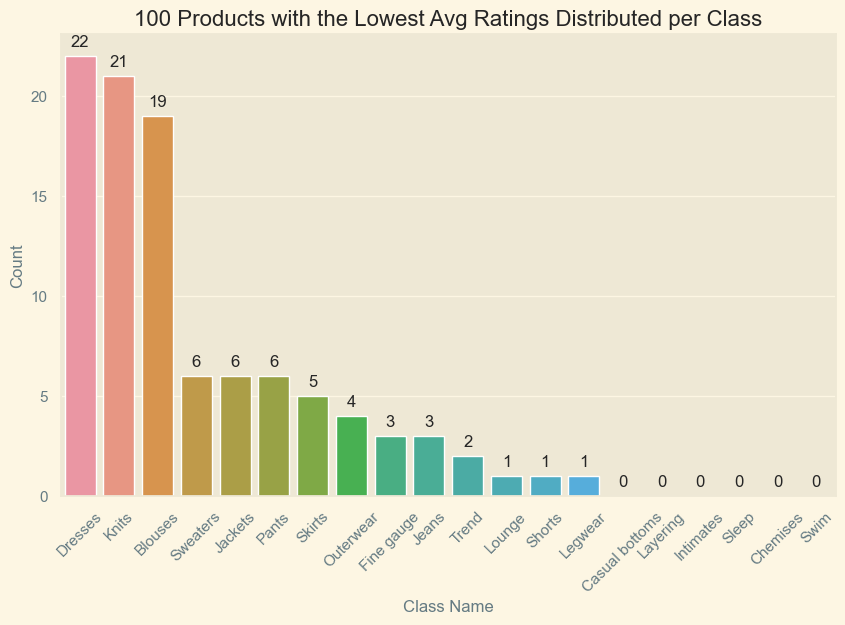

In [55]:
#counting per class
class_counts = combined_lowest_ratings['class_name'].value_counts()

plt.figure(figsize=(10, 6))
bar_plot = sns.countplot(x='class_name', data = combined_lowest_ratings, order=class_counts.index)

#totals per bar
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 10), 
                      textcoords = 'offset points')

plt.title('100 Products with the Lowest Avg Ratings Distributed per Class')
plt.xlabel('Class Name')
plt.ylabel('Count')
plt.xticks(rotation=45)  #rotation of labels
plt.show()

### Detailed Analysis of Dresses, Knits, and Blouses

Following the distribution of the lowest average ratings among the top 100 products, we will conduct an in-depth examination of Dresses, Knits, and Blouses.

### Focus on Dresses: Improving the 'Star' Product

Dresses emerge as a leading category within the General division, signifying their status as the e-commerce store's 'star' product due to their exceptional sales numbers. To better comprehend the customer feedback and drive improvements, a Word Cloud analysis of the *review_text* will be performed. To enhance the Word Cloud's precision, common stopwords and less informative verbs will be excluded.

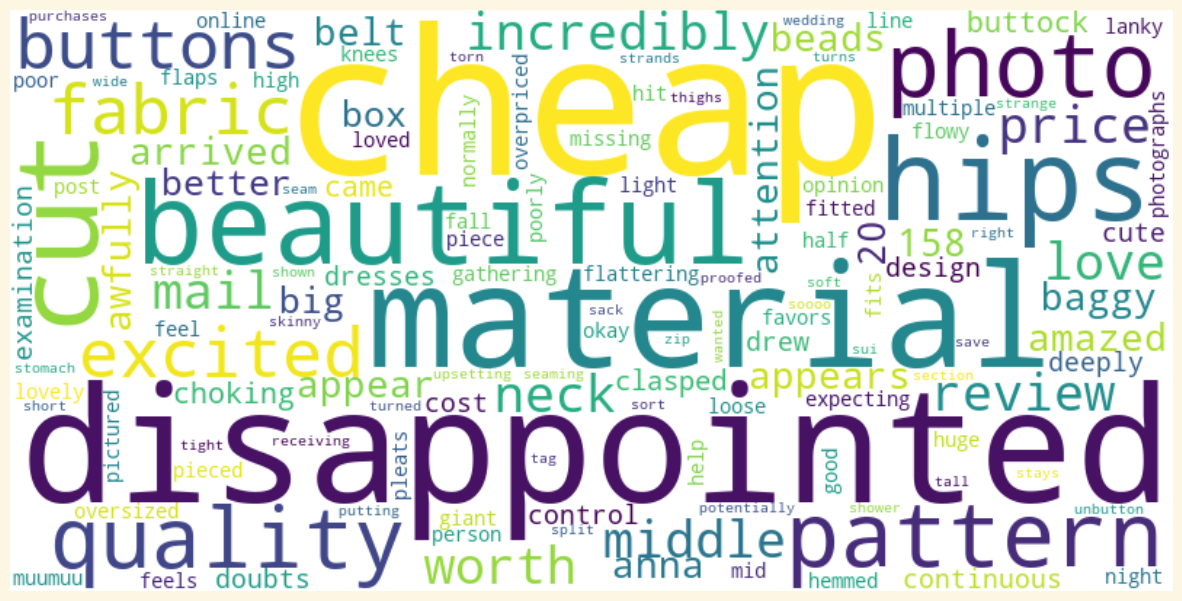

In [56]:
# Narrowing down to reviews specifically for dresses in the general division
dress_reviews = combined_lowest_ratings[(combined_lowest_ratings['class_name'] == 'Dresses') & 
                                        (combined_lowest_ratings['division_name'] == 'General')]

# Transforming the review texts into a matrix of token frequencies
review_matrix = vectorizer.fit_transform(dress_reviews['review_text'])
# Extracting the list of words that were vectorized
words_list = vectorizer.get_feature_names_out()
# Summing up the word counts across all dress reviews
counts = review_matrix.sum(axis=0)
# Forming a mapping of words to their frequency of occurrence
frequencies = dict(zip(words_list, counts.tolist()[0]))

# Initializing a WordCloud object to visualize the word frequencies
word_cloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frequencies)

# Plotting the word cloud with specific dimensional properties and no axis
plt.figure(figsize=(15, 10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')  # Ensuring the axis is not visible to emphasize the word cloud
plt.show()

### Analyzing Common Words in Reviews

Upon examining customer feedback, it appears that the terms 'disappointed', 'material' and 'cheap' are frequently used. Let's delve deeper into these reviews.

In [57]:
def check_for_keywords(review):
    # Tokenization of the review text
    tokenized_review = word_tokenize(review.lower())
    # Check for the presence of specific keywords within the review
    return any(keyword in tokenized_review for keyword in ['disappointed', 'material', 'cheap'])

# First, filter reviews based on the presence of specific keywords
keyword_filtered_df = combined_lowest_ratings[combined_lowest_ratings['review_text'].apply(check_for_keywords)]

# Next, refine this filtered set to include only 'Dresses' in the 'General' division
final_filtered_df = keyword_filtered_df[(keyword_filtered_df['class_name'] == 'Dresses') & 
                                        (keyword_filtered_df['division_name'] == 'General')]

# Display the relevant sections of the final filtered DataFrame
final_filtered_df[['rating', 'review_text', 'clothing_id']]

,rating,review_text,clothing_id
11762,1,"I'm so disappointed. the dress looked lovely in the box, but when i started to unbutton it to try it on, two buttons split in half! it's going right back.",1079
8850,1,Was so excited to get this dress because i thought it was cute and i love flowy and big dresses - however this looks huge. the material is not soft so it doesn't fall well. it just stays proofed out so from the back you look like a giant!!,1088
1105,1,"There is no way this is worth the price. i was deeply disappointed when it arrived. the material is thin and feels cheap. i love the design, and anna sui, but this is just so overpriced.",1076
1440,1,"Looks fitted on, but this just turned out to be an oversized muumuu on. the fabric also felt cheap.",1087
1341,1,I'm so incredibly disappointed. the dress is beautiful but the one i received is torn and has multiple strands of beads missing. poor quality control.,1098
389,1,"I don't normally review my purchases, but i was so amazed at how poorly this dress was made, i couldn't help myself but to post a review. the neck line isn't even hemmed down so it flaps up. the material is thin and feel cheap. this dress isnt even worth $20 in my opinion. i was expecting a well made, good quality dress for the high price tag.",1104
7225,1,So disappointed! beautiful dress in the photographs but the cut was incredibly strange. loose and baggy through the top and mid-section but tight around the buttock and thighs.,1092
972,1,Very cheap looking material. looks cheap to cost $158.,1094
1828,1,"I really wanted to like this dress and was so disappointed when it came in the mail. if you have any sort of hips, the light pattern in the middle doesn't do you any favors. this made my hips look soooo wide! and the seaming and gathering in the middle was just off. if it was one continuous piece of fabric it might look better. with the seam, the pattern was cut up and looked pieced together. that just drew too much attention to my stomach and hips. it had to go back.",1080


# Detailed Customer Feedback Analysis on Low-Rated Dresses

## Common Issues Highlighted by Customers:

- **Poor Quality**: A recurrent theme across several reviews where customers express disappointment with the product quality not meeting their expectations.

- **Misleading Product Photos**: Customers noted discrepancies between the product photos showcased on the website and the actual product received, leading to dissatisfaction.

- **Fit Issues**: There are reports of products not fitting as expected, which contributes to a negative shopping experience.

- **Material or Craftsmanship Problems**: Complaints also include problems related to the material of the product and its craftsmanship, indicating a need for better quality control.

## Focus on Knits: Enhancing Customer Satisfaction

Knits stand out as a pivotal category within the Casual division, marking their significance in the e-commerce platform's product range owing to their high popularity among customers. The analysis aims to deeply understand the feedback provided by customers to instigate meaningful improvements. A Word Cloud analysis of the *review_text* associated with knits will be undertaken. This analysis is pivotal for:

- Identifying specific customer grievances or praise.
- Elevating the precision of feedback analysis by excluding common stopwords and less informative verbs from the Word Cloud.

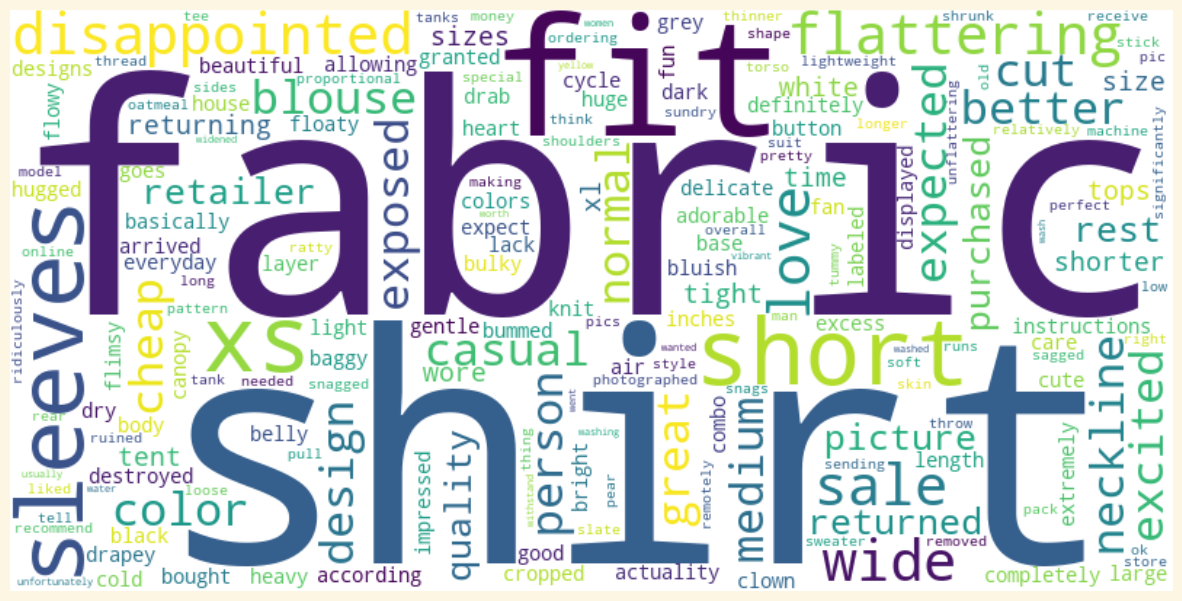

In [58]:
# Filtering for 'Knits' in the 'General' division from combined ratings
knits_reviews = combined_lowest_ratings[(combined_lowest_ratings['class_name'] == 'Knits') & 
                                        (combined_lowest_ratings['division_name'] == 'General')]

# Define a custom set of stop words to supplement the default English stop words
additional_stop_words = ['just', 'really', 'look', 'looked', 'wasn', 'received', 'trying', 
                         'looking', 'started', 'isn', 'didn', 'felt', 'did', 'does', 'wear', 
                         'know', 'couldn', 'tried', 'looks', 'way', 'ordered', 'dress', 
                         'like', 'thought', 'doesn', 'don', 've', 'going', 'isnt', 'come', 
                         'try', 'got']

# Combine the custom and default stop words
full_stop_words = ENGLISH_STOP_WORDS.union(additional_stop_words)

# Initialize the CountVectorizer with the comprehensive stop words list
vectorizer = CountVectorizer(stop_words=list(full_stop_words))

# Apply the vectorizer to the review texts to get a word frequency matrix
word_frequency_matrix = vectorizer.fit_transform(knits_reviews['review_text'])

# Retrieve the vectorized word labels and their respective counts
vectorized_words = vectorizer.get_feature_names_out()
counts = word_frequency_matrix.sum(axis=0)

# Form a dictionary mapping words to their frequencies
words_and_frequencies = dict(zip(vectorized_words, counts.tolist()[0]))

# Creating a word cloud from the word frequencies
knits_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words_and_frequencies)

# Displaying the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(knits_wordcloud, interpolation='bilinear')
plt.axis('off')  # Turns off the axis for cleaner visualization
plt.show()

## Analysis of Common Terms in Reviews

The terms 'fabric', 'shirt', 'fit', 'cheap', 'disappointed' are notably prevalent in the current set of reviews. Let's delve deeper into these aspects.

In [59]:
# Define a function to check for the presence of specific keywords in the text
def check_for_keywords(review):
    # Convert the review text to lowercase and tokenize it
    tokenized_review = word_tokenize(review.lower())
    # Define keywords to check for in the reviews
    keywords = ['fabric', 'shirt', 'fit', 'cheap', 'disappointed']
    # Return True if any of the keywords are found in the tokenized review
    return any(keyword in tokenized_review for keyword in keywords)

# First, filter the DataFrame based on class name and division
knits_general_df = combined_lowest_ratings[(combined_lowest_ratings['class_name'] == 'Knits') & 
                                           (combined_lowest_ratings['division_name'] == 'General')]

# Then, from the already filtered DataFrame, select reviews containing any of the specified keywords
filtered_knits_df = knits_general_df[knits_general_df['review_text'].apply(check_for_keywords)]

# Display the final filtered DataFrame focusing on ratings, review texts, and clothing IDs
filtered_knits_df[['rating', 'review_text', 'clothing_id']]

,rating,review_text,clothing_id
2243,1,"I was excited to receive this top. it looked great online, vibrant colors with the beautiful detail on the sleeves. when i tried it on, the fabric looked and felt cheap. it is not a flowy top. do not recommend it.",870
15059,1,I was really disappointed when i tried this top on. the design and cut of the neckline is very bulky and just off. the cut of the top overall was just off.,881
2751,1,"I purchased this top on sale and was really excited about the style. it fit great the first time i wore it. i washed it once, according to the care instructions. after washing it in cold water and allowing it to air dry, it was basically ruined. it shrunk up in length widened out about two inches. i'm pretty bummed about it because it was cute.",868
2757,1,I love sundry and their fun designs--i was disappointed because the fabric is very thin and the dark part of the heart is not black but bluish slate grey. it is just not what i expected from the picture. i bought the xs and it felt baggy on the body.,878
10640,1,I was very disappointed in the quality of this top. the first time i wore it it snagged right in the front. i had to pull the thread under so it wasn't exposed. i put it in the wash in the gentle cycle and it was destroyed with several more snags when i removed it from the machine. this top is extremely delicate and doesn't withstand normal everyday casual wear although it's s casual lightweight sweater. now it's just a wear around the house ratty throw around shirt.,879
5176,1,"I got this shirt in a medium, my normal retailer size and while the short fit, the front is cropped! i am a fan of the tops that are shorter in the front and longer in the back, however this was just too short in the front. my belly button was exposed, and that wasn't the look displayed on the model. unfortunately this top is going back to the store.",865
5779,1,This shirt would be perfect if i needed a canopy on my tent. this shirt runs ridiculously large. purchased a medium and it should be labeled an xl. no impressed with the pattern in person. looks cheap. will be returning.,880
5247,1,Even on sale sale...this tank is not worth the money. the design in the back is adorable & would expect it to be so much better quality but the fabric is flimsy(think old man white tanks that come in a pack) completely see through and lack of shape..i wanted to love this but definitely photographed significantly better than actuality!,871
1854,1,"Ordered a l and xl, the sleeves were so tight on both sizes but the rest of the shirt was wide and loose. the tight sleeves were not proportional with the rest of the shirt. both sizes had to be returned.",857
1769,1,"I thought from the picture this would be a light floaty top. when it arrived, the fabric was a heavy knit and the neckline sagged very low. on me (granted i'm a pear) the bottom layer hugged my tummy and rear in a very unflattering way. the only thing i liked was the color. back it went.",867


# Detailed Customer Feedback Analysis on Low-Rated Knits


## Common Issues Highlighted by Customers

- **Problems with Fabric and Quality:**
    - Several customers mention that the fabric quality does not match their expectations; either it appears cheap, shrinks after washing, or is too sheer.
    - Delicacy of the garment seems to be an issue; some people experienced unraveling or destruction during a gentle wash cycle.

- **Issues with Sizing and Fit:**
    - Sizing is inconsistent and often does not match the displayed fit on the model. Some say the sizing is too large or too cropped at the front.
    - The sleeves and neckline fit was problematic for some customers, either being too tight or too loose.

- **Design Concerns:**
    - Complaints were made about the bulkiness and overall design of the neckline, as well as the amount of fabric being too much or not flattering.
    - Contrary to the product photos, the clothing color was sometimes less vibrant than expected.

- **General Dissatisfaction:**
    - Customers expressed disappointment due to the disparity between the online representation and the actual product.
    - The expectation of a light, ‘floaty’ top was not met for a number of reviewers, leading to dissatisfaction.

## Focus on Blouses: Improving the 'Star' Product

Blouses emerge as a leading category within the General division, signifying their status as the e-commerce store's 'star' product due to their exceptional sales numbers. To better comprehend the customer feedback and drive improvements, a Word Cloud analysis of the `review_text` will be performed. To enhance the Word Cloud's precision, common stopwords and less informative verbs will be excluded.

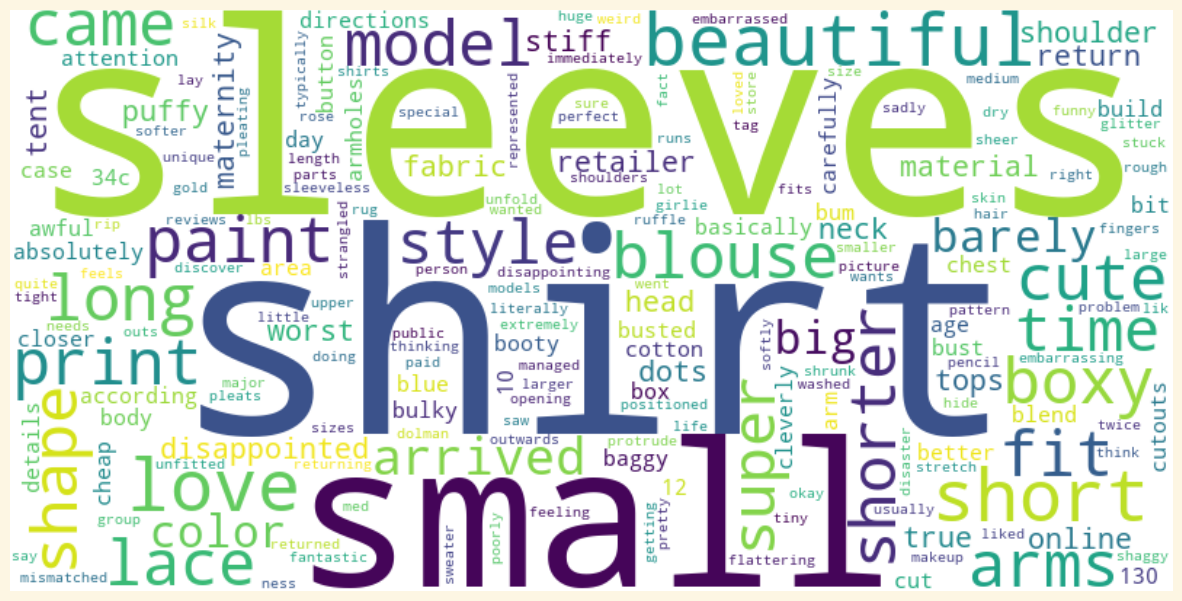

In [60]:
# Filtering for 'blouses' in the 'General' division from combined ratings
blouses_reviews = combined_lowest_ratings[(combined_lowest_ratings['class_name'] == 'Blouses') & 
                                        (combined_lowest_ratings['division_name'] == 'General')]

# Define a custom set of stop words to supplement the default English stop words
additional_stop_words = ['just', 'really', 'look', 'looked', 'wasn', 'received', 'trying', 
                         'looking', 'started', 'isn', 'didn', 'felt', 'did', 'does', 'wear', 
                         'know', 'couldn', 'tried', 'looks', 'way', 'ordered', 'dress', 
                         'like', 'thought', 'doesn', 'don', 've', 'going', 'isnt', 'come', 
                         'try', 'got']

# Combine the custom and default stop words
full_stop_words = ENGLISH_STOP_WORDS.union(additional_stop_words)

# Initialize the CountVectorizer with the comprehensive stop words list
vectorizer = CountVectorizer(stop_words=list(full_stop_words))

# Apply the vectorizer to the review texts to get a word frequency matrix
word_frequency_matrix = vectorizer.fit_transform(blouses_reviews['review_text'])

# Retrieve the vectorized word labels and their respective counts
vectorized_words = vectorizer.get_feature_names_out()
counts = word_frequency_matrix.sum(axis=0)

# Form a dictionary mapping words to their frequencies
words_and_frequencies = dict(zip(vectorized_words, counts.tolist()[0]))

# Creating a word cloud from the word frequencies
blouses_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words_and_frequencies)

# Displaying the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(blouses_wordcloud, interpolation='bilinear')
plt.axis('off')  # Turns off the axis for cleaner visualization
plt.show()

## Analysis of Common Terms in Reviews

The terms 'small', 'shirt', 'sleeves', 'long', 'disappointed' are notably prevalent in the current set of reviews. Let's delve deeper into these aspects.

In [61]:
# Define a function to check for the presence of specific keywords in the text
def check_for_keywords(review):
    # Convert the review text to lowercase and tokenize it
    tokenized_review = word_tokenize(review.lower())
    # Define keywords to check for in the reviews
    keywords = ['small', 'shirt', 'sleeves', 'long', 'disappointed']
    # Return True if any of the keywords are found in the tokenized review
    return any(keyword in tokenized_review for keyword in keywords)

# First, filter the DataFrame based on class name and division
blouses_general_df = combined_lowest_ratings[(combined_lowest_ratings['class_name'] == 'Blouses') & 
                                           (combined_lowest_ratings['division_name'] == 'General')]

# Then, from the already filtered DataFrame, select reviews containing any of the specified keywords
filtered_blouses_df = blouses_general_df[blouses_general_df['review_text'].apply(check_for_keywords)]

# Display the final filtered DataFrame focusing on ratings, review texts, and clothing IDs
filtered_blouses_df[['rating', 'review_text', 'clothing_id']]

,rating,review_text,clothing_id
6298,1,"I wanted to love this sweater but it is a return. it is a very weird fit, very thick, rug-like material and unfitted. the shoulders are bulky, the top is big and the booty is small. i am 5'2"", 34c and typically wear a small. the arms were very long, way too long. i will say other than that the top was true to size, may look okay on someone who had a larger chest and a smaller bum!",841
11867,1,"One of the worst shirts i've tried in a long time. i don't know how they managed to give it a little shape on the model. in person it is sleeveless, huge, short and wide.",818
5186,1,This shirt has absolutely no shape. look carefully at the model and you we discover she is cleverly positioned to hide the sheer boxy-ness of this shirt. the print is beautiful but it looks like a maternity shirt. i even ordered the xs at 5'7 and 130 lbs but found it too baggy. returned.,840
3945,1,"I really liked this shirt the one time i got to wear it...but when i washed it, according to the directions on the tag, it shrunk! a lot! the sleeves are now too tight, and it is much shorter. thinking about returning it to the store, but in any case, i cannot wear it again.",819
5109,1,The print and front ruffle are beautiful. the sleeves are awful and poorly represented in the picture of the model. it's almost like the sleeves have a life of their own - so mismatched with this style of blouse. such a beautiful print but so disappointing in shape.,823
18320,1,"I should have paid closer attention to the other reviews. i could barely get this blouse over my head! after getting it on, the armholes too are very small. the blouse other than that is pretty and very girlie. i love the pleating and dolman sleeves but i was strangled around my neck. i tried the small but think a medium wouldn't have been much better. it needs a button opening on neck and sleeves. i would have to put this on before makeup or doing my hair. \r\nif you have a tiny head and pencil a",830
7510,1,"This is the worst shirt i have ever tried on from retailer. it is basically a big shaggy box from the front, and from the side it looks like a tent. it is also short.",836
565,1,"This top runs super small in the upper arms, shoulder area..could not even stretch out my arms! ...other then that major problem, the length and body fit were perfect...i am true med and/or large in all retailer tops so i tried sizes 10, 12 and neither worked for me due to arm/shoulder fit...disappointed because it really is a beautiful top...",833
4564,1,I got the blue. it is very short. one side of the shirt i received was shorter that the other. the material feels cheap and pleats out a bit right over the bust - only flattering on small busted models.,820
3820,1,"I saw this top online and ordered immediately!\r\ni loved the color, lace, and unique details.\r\nsadly it just arrived and it is a disaster!\r\nthe lace is stiff and doesn't lay softly, and is very rough against your skin.\r\nthe style ( and i like shorter style tops) is extremely boxy and the sleeves protrude outwards in a funny way.,.....\r\nthat although i am so in love with this color, i would be embarrassed to wear this top in public.\r\nit could have been fantastic, if the lace was softer, and some a",828


# Detailed Customer Feedback Analysis on Low-Rated Blouses


## Common Issues Highlighted by Customers

The reviews in the provided image mainly describe issues customers had with clothing items they purchased. Here are the problems they reported:

- **Odd fit and inconsistent sizing** - Reviews mention items being too small in certain areas like the booty, upper arms, shoulder area, or armpits, while being too large or baggy in others. Specific issues include bulky shoulders, tops that are too long, or clothes feeling like a box or tent when worn.

- **Quality of material** - Complaints about the material include descriptions such as "weird fit," "thick, rug-like material," and "maternity shirt."

- **Design issues** - Some customers had problems with shapelessness, the positioning of models in pictures hiding the true shape of the items, or sleeves behaving as if they have a life of their own. In one case, one side of the item was shorter than the other.

- **Disappointment with appearance** - Customers were unhappy with how the items looked on them compared to the model, with some stating the product was one of the worst items they had tried on and that it lacked shape.

- **Functional issues** - Difficulties included problems putting the blouse over the head or the need for an extra button opening on the neck.

- **Shrinking after washing** - At least one customer reported significant shrinkage after following laundering instructions.

- **Style and aesthetic concerns** - A couple of reviews expressed dissatisfaction with the aesthetic, including an item described as having a "saggy box from the front" and looking like a "tent" from the side.

These reviews suggest that there are considerable issues with product sizing, material quality, design, and appearance, which resulted in customer dissatisfaction and subsequent returns.